**Financial Signal Processing Coursework**

Student: Xinyuan Xu

CID: 01183830

April 2020

# Regression Methods

## Processing Stock Price data in Python

### Natural-Log Transform of the Price

Text(0.5, 1.0, 'log(price) history of SPX Index')

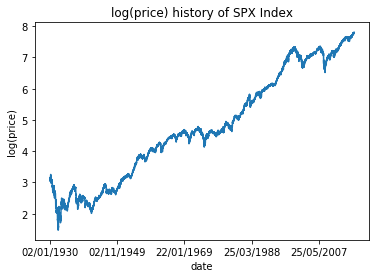

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

px = pd.read_csv("priceData.csv", header=0, index_col=0)
# the origial hear of the price column is "SPX Index"
# the space will affect calling of that column, so is replaced by "_" by directly editing the .csv file
price = px.SPX_Index
price = pd.Series(price)
logpx = np.log(px.SPX_Index)
logpx.plot()

plt.ylabel('log(price)')
plt.title('log(price) history of SPX Index')

The range of the price data is compressed by natural log transform, so it is easier to process.

### Sliding Window Statistics

Text(0.5, 1.0, 'mean of price, window=252days')

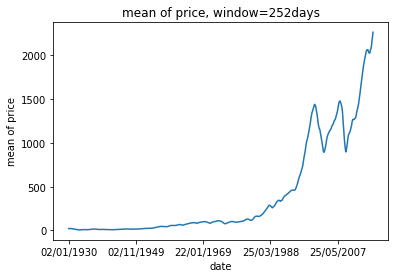

In [2]:
plt.figure()
mean_price = price.rolling(252,min_periods=1).mean()
mean_price.plot()

plt.ylabel('mean of price')
plt.title('mean of price, window=252days')

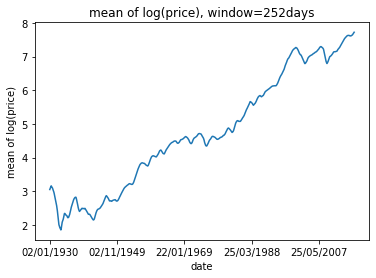

In [3]:
plt.figure()
mean_log_price=logpx.rolling(252, min_periods=1).mean()
mean_log_price.plot()

plt.ylabel('mean of log(price)')
plt.title('mean of log(price), window=252days')
plt.show()

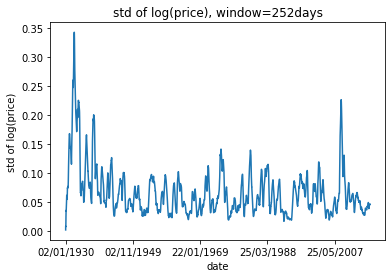

In [4]:
plt.figure()
std_log_price = logpx.rolling(252,min_periods=1).std()
std_log_price.plot()

plt.ylabel('std of log(price)')
plt.title('std of log(price), window=252days')
plt.show()

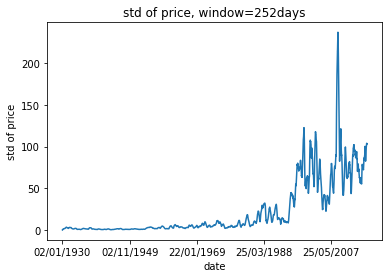

In [5]:
plt.figure()
std_price = price.rolling(252,min_periods=1).std()
std_price.plot()

plt.ylabel('std of price')
plt.title('std of price, window=252days')
plt.show()

- Sliding mean (or moving average) smooths the signal. Standard deviation demonstrates the volatility of the prices.
- A stochastic signal is considered wide-sense stationary (WSS) if the first moment (the mean) is time invariant and the autocorrelation function is dependent on time differences only.
- The price and log-price time-series are not stationary at all, because the mean and std of both price and log price are always changing with time.

### Simple and Log Return

simple return = $\frac{P[t] - P[t-1]}{P[t-1]} $

log return = $ln(\frac{P[t]}{P[t-1]})$

Text(0.5, 1.0, 'mean of log return, window=252days')

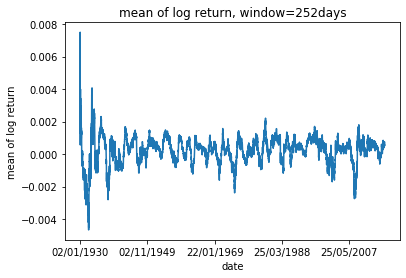

In [6]:
logret = logpx.diff()
simpret = price.pct_change()

plt.figure()
logret.rolling(252,min_periods=1).mean().plot()

plt.ylabel('mean of log return')
plt.title('mean of log return, window=252days')

Text(0.5, 1.0, 'std of log return, window=252days')

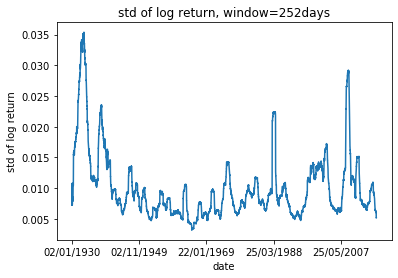

In [7]:
plt.figure()
logret.rolling(252,min_periods=1).std().plot()

plt.ylabel('std of log return')
plt.title('std of log return, window=252days')

- Log return is not stationary, although it is more stationary than log price.
- Mean of log return is relatively stable around 0, which is more stationary than mean of mean of price or log price.
- Similar to std of price or log price, standard deviation of log return could vary between 0.035 and 0.005 during this time peroid, so is not very stationary.

Text(0.5, 1.0, 'mean of simple return, window=252days')

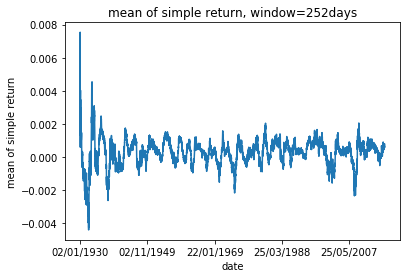

In [8]:
plt.figure()
simpret.rolling(252,min_periods=1).mean().plot()

plt.ylabel('mean of simple return')
plt.title('mean of simple return, window=252days')

Text(0.5, 1.0, 'std of simple return, window=252days')

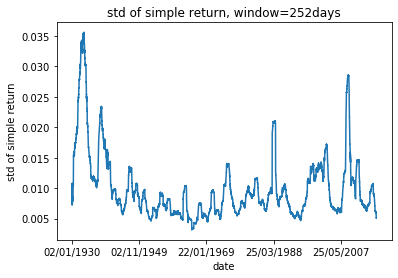

In [9]:
plt.figure()
simpret.rolling(252,min_periods=1).std().plot()

plt.ylabel('std of simple return')
plt.title('std of simple return, window=252days')

- The mean and std of simple return has similar shape with that of log return, because at small return, log return is approximately equal to simple return . 
- As std of simple return also varies a lot, simple return is not stationary as well.

In [10]:
print(logret[100])
print(simpret[100])

0.008288485080056862
0.00832292967124415


### Suitability of Log return over simple return

1) behavior of log return is symmetric: a 10% increase followed by a 10% decrease in terms of log return means price goes back to the original number; (this is also time daditivity)

2) log function is a monotonic function which preserves "relative ordering"

3) log function compresses the range of data and also conditions the original data probability distribution function

4) if price follows log-normal distribution, then log return is conveniently normal distributed.

5) other advantages include mathematical tractability, numerical stability (safer to add instead of multiply small numbersf) and homomorphic processing.





In [11]:
from scipy import stats
# type(logret) pandas series
logret = logret.dropna()
stats.jarque_bera(logret)

(311807.2704898989, 0.0)

In [12]:
simpret = simpret.dropna()
stats.jarque_bera(simpret)

(284160.67730312835, 0.0)

In [13]:
stats.jarque_bera(logret[:30])

(1.463519177132134, 0.4810617741357005)

In [14]:
stats.jarque_bera(simpret[:30])

(1.4592296470606705, 0.48209464584652406)

In [15]:
stats.jarque_bera(logret[:300])

(35.931594681478074, 1.5759896165867815e-08)

In [16]:
stats.jarque_bera(simpret[:300])

(27.202029022873496, 1.239237221728473e-06)

- The closer the data sample follows a Gaussian distribution, the closer to 0 is the jarque bera statistic.
- Over a long time scale (the whole history of data set), the statistics of both log return and simple return are large numbers, meaning they do not follow a normal distribution. 
- Over a period of 30 days, both simple return and log return follows normal distribution. So the assuption of normality only applies in the short term.

### Question 1.1.5 

| | Day 0 | Day 1   | Day 2 |
|- | - | - | - |
| Price:  |          1    |  2      |  1 |
| Simple return:  |  /    |  100%   |  -50%|
| Log return:     |  /    |  log(2) |  log(0.5) = -log(2)| 

This is an example that demonstrates the time additivity or symmetricity of log return.

### Question 1.16: 

- First, Log return should not be used over a long time scale, because it is unreasonable to assume log-mormality over a long period of time. Also, due to "periodic" financial crisis, financial data is negatively skewed, while log-normal distributions are positively skewed. 

- Second, log return could not be used in portforlio, as log return numbers could not be linearly added across asset. For example, log return of Apple stock and Microsoft stock of one day could not be added together to get their total return. Whereas simple returns are linearly additive and could be used in portfolio return calcualation.

## ARMA vs ARIMA models for financial applications

### Question 1.2.1

ARMA model has a wide range of applicaiton in financial data analysis:
- AR (autoregressive) regresses the variable on its historical values;
- The momentum and mean reversion effects often observed in trading markets could be explained by the autoregressive component. 
- MA (moving average) attempts to model an error correction term based on historical model error values.
- MA part could be interpreted as white noise, or random events, such as breaking news, that changes the price.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.ar_model import AR
import copy

Text(0.5, 1.0, 'log(closing price) of S&P500 from 2015 to 2019')

<Figure size 432x288 with 0 Axes>

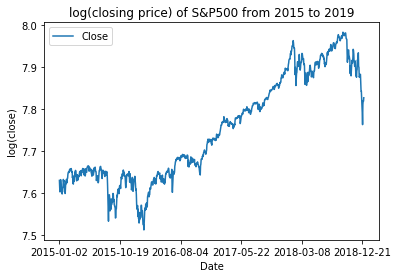

In [18]:
snp = pd.read_csv('snp_500_2015_2019.csv')
snp.set_index(['Date'],inplace=True)
snp_close = snp['Close'].to_frame().apply(np.log)
plt.figure()
snp_close.plot()
plt.ylabel('log(close)')
plt.title('log(closing price) of S&P500 from 2015 to 2019')

Text(0.5, 1.0, 'mean of s&p500, window=100days')

<Figure size 432x288 with 0 Axes>

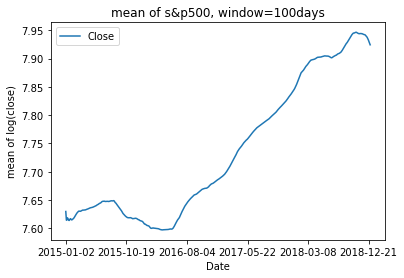

In [19]:
plt.figure()
mean_snp = snp_close.rolling(100,min_periods=1).mean()
mean_snp.plot()

plt.ylabel('mean of log(close)')
plt.title('mean of s&p500, window=100days')

Text(0.5, 1.0, 'standard deviation of s&p500, window=100days')

<Figure size 432x288 with 0 Axes>

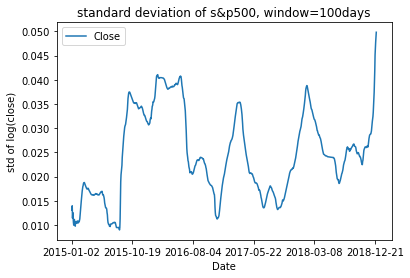

In [20]:
plt.figure()
mean_snp = snp_close.rolling(100,min_periods=1).std()
mean_snp.plot()

plt.ylabel('std of log(close)')
plt.title('standard deviation of s&p500, window=100days')

- Stationarity is the key assumption for ARMA model.
- The two figures above clearly shows that S&P500 index over this 4 years is non stationary, thus ARIMA model should be used instead of ARMA model.

### ARMA

General Form: $x[t] = \sum^{p}_{i=1} a_i x[t-i] + \sum^{q}_{i=1} b_i \eta[t-i] + \eta[t]$

In [21]:
snp_arma = copy.deepcopy(snp_close)
snp_arma.columns = ['True']
ARIMA(snp_arma, order=(1,0,0)).fit().params


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


const         7.739998
ar.L1.True    0.997359
dtype: float64

The parameters suggest that 

1) the log closing price centres around 7.74, which could be confirmed by direction observation of snp_close data

2) the closing price of one day is closly correlated to the price of the day before. This of course makes sense, as price rarely moves in large magnitude arbitrarily. By observing the plot below, the AR(1) model prediction follows the true signal quite closly.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


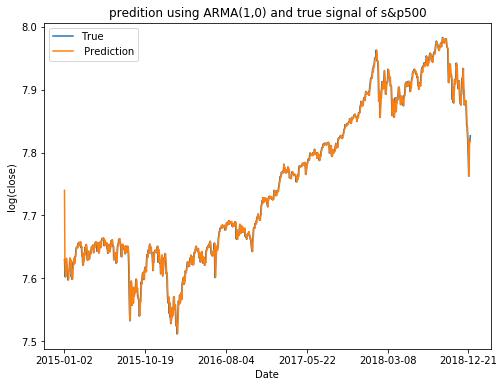

In [22]:
snp_arma = copy.deepcopy(snp_close)
snp_arma.columns = ['True']
snp_arma['Res']=ARIMA(snp_arma, order=(1,0,0)).fit().resid 
snp_arma['Prediction']=snp_arma['True']-snp_arma['Res']

plt.figure(figsize=(8,6))
snp_arma['True'].plot()
snp_arma['Prediction'].plot()
plt.legend(['True',' Prediction'])
plt.ylabel('log(close)')
plt.title('predition using ARMA(1,0) and true signal of s&p500')
plt.show()

In [23]:
MSE = snp_arma['Res'].pow(2).mean()
print(MSE)
# mean square error of ARMA(1,0) model

8.627195459688109e-05


- The mean squared error is quite small, suggesting good model accuracy.
- In practice, this model may not be useful, as model with higher accuracy might be needed to get profit.
- Also the model order limits the prediction time span: using price of today could only get a decent prediction of tomorrow. Prediction deeper into future will quickly accumulate errors, making it less useful.

### ARIMA

ARIMA is almost the same as ARMA but it remove elements of non-stationarity by an initial differencing applied. This is the integration part of the model.

General Form: $y[t] = \sum^{p}_{i=1} a_i y[t-i] + \sum^{q}_{i=1} b_i \eta[t-i] + \eta[t]$

In this Question d = 1, so $y[t]$ is the first difference of $x[t]$: $y[t]=x[t]-x[t-1]$

In [24]:
snp_arima = copy.deepcopy(snp_close)
snp_arima.columns = ['True']
ARIMA(snp_arima, order=(1,1,0)).fit().params

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


const           0.000196
ar.L1.D.True   -0.008751
dtype: float64

The ar.L1.D.True suggests:
- return series is more stable and stationary
- there is little correlation between successive returns, 
- if there is correlation between two successive returns, they are likely to be negatively correlated

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


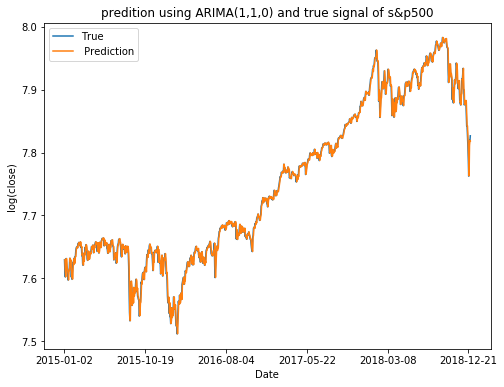

In [25]:
snp_arima = copy.deepcopy(snp_close)
snp_arima.columns = ['True']
snp_arima['Res']=ARIMA(snp_arima, order=(1,1,0)).fit().resid 
snp_arima['Prediction']=snp_arima['True']-snp_arima['Res']

plt.figure(figsize=(8,6))
snp_arima['True'].plot()
snp_arima['Prediction'].plot()
plt.legend(['True',' Prediction'])
plt.ylabel('log(close)')
plt.title('predition using ARIMA(1,1,0) and true signal of s&p500')
plt.show()

In [26]:
MSE = snp_arima['Res'].pow(2).mean()
print(MSE)
# mean square error of ARIMA(1,1,0) model

7.428310856424769e-05


- The two models are similarly meaningful since both predict the true signal quite well.
- ARMA model works better when the signal has been properly detrended.
- ARIMA model has has an integration term thus does require detrending before modeling.
- In terms of mean squared error, ARIMA model predicts S&P500 index better than ARMA model.

### log of the prices for the ARIMA analysis

- log return = $ln(\frac{x[t]}{x[t-1]}) = ln(x[t])-ln(x[t-1])$
- Log return is the difference of log prices. 
- So if ARIMA model is applied onto log price, then the prediction $y[t]$ is exactly the log return. 
- This makes the analysis very meaningful.

In [27]:
snp_arima = copy.deepcopy(np.log(snp_close))
snp_arima.columns = ['True']
ARIMA(snp_arima, order=(1,1,0)).fit().params

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


const           0.000025
ar.L1.D.True   -0.008835
dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


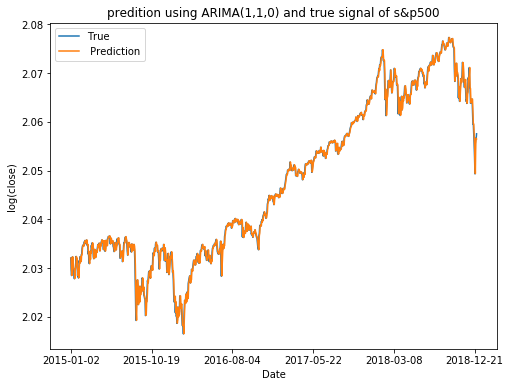

In [28]:
snp_arima = copy.deepcopy(np.log(snp_close))
snp_arima.columns = ['True']
snp_arima['Res']=ARIMA(snp_arima, order=(1,1,0)).fit().resid 
snp_arima['Prediction']=snp_arima['True']-snp_arima['Res']

plt.figure(figsize=(8,6))
snp_arima['True'].plot()
snp_arima['Prediction'].plot()
plt.legend(['True',' Prediction'])
plt.ylabel('log(close)')
plt.title('predition using ARIMA(1,1,0) and true signal of s&p500')
plt.show()

In [29]:
MSE = snp_arima['Res'].pow(2).mean()
print(MSE)
# mean square error of ARIMA(1,1,0) model on log price

1.2449989151386776e-06


The mean squared error or model prediction has reduced approximatly 70 times, when log price is used compared to using raw price. Therefore, it is necessary and beneficial to take the log of the prices for the ARIMA analysis.

## Vector Autoregressive Models

### Question 1.3.1
$\textbf{Y}=\textbf{BZ}+\textbf{U}$ 

$\textbf{Y} \in R^{K \times T}$

$\textbf{Y} = \begin{bmatrix} \textbf{y}_1 & \textbf{y}_2 & ... & \textbf{y}_T \end{bmatrix}$ 

Matrix Y is made up of T columns of $\textbf{y}_t$ representing the output of AR process at time t. Each $\textbf{y}_t$ has K elements in the vector, thus Y has K rows.

$\textbf{B} = \begin{bmatrix} \textbf{c} & \textbf{A}_1 & \textbf{A}_2 & ... & \textbf{A}_p \end{bmatrix}$ 

$\textbf{c}$ is a vector of K constants, invariant of time.

$\textbf{A}_i = \begin{bmatrix} a^i_{1,1} & a^i_{1,2} & ... & a^i_{1,k} \\ a^i_{2,1} & a^i_{2,2} & ... & a^i_{2,k} \\ ... & ... & ... & ... \\ a^i_{k,1} & a^i_{k,2} & ... & a^i_{k,k} \\ \end{bmatrix} $

$i = 1,2, ... , k$

$\textbf{A}_i$ represents the AR coefficients and is a $K \times K$ matrix.

It is clear that each element in $B$ has K rows. $\textbf{c}$ is a column vector of 1 column. Each $\textbf{A}_i$ has K columns and there are P of them, so $\textbf{B} \in R^{K \times (KP+1)}$.

For each column of Y, it can be represented as:
$\textbf{y}_t = \textbf{c} + \textbf{A}_1\textbf{y}_{t-1}  + \textbf{A}_2\textbf{y}_{t-2} + ... + \textbf{A}_p\textbf{y}_{t-p} + \textbf{e}_t$

$\textbf{y}_t = \textbf{B} \begin{bmatrix} 1 \\ \textbf{y}_{t-1} \\ \textbf{y}_{t-2} \\ ... \\ \textbf{y}_{t-p} \end{bmatrix} + \textbf{e}_t 
= \textbf{B} \textbf{z}_t + \textbf{e}_t $

$z_t$ is the past process output vector stacking up under a scalar 1. So it has 1+KxP rows.

$\textbf{Z} = \begin{bmatrix} \textbf{z}_1 & \textbf{z}_2 & ... & \textbf{z}_T \end{bmatrix}$. Therefore $\textbf{Z} \in R^{(KP+1) \times T}$.

$\textbf{U} = \begin{bmatrix} \textbf{e}_1 & \textbf{e}_2 & ... & \textbf{e}_T \end{bmatrix}$

$e_t$ is the process model error at time t and is a K-element vector. Thus $\textbf{U} \in R^{K\times T}$.



### Question 1.3.2 

$\varepsilon = \textbf{Y}-\textbf{BZ}$

For $\textbf{B}_{opt}$, error must be othorgonal to $\textbf{Z}$:    $\textbf{Z}^T \varepsilon = \textbf{0}$.

$\textbf{Z}^T (\textbf{Y}-\textbf{BZ}) = \textbf{0}$

$\textbf{Z}^T \textbf{Y} - \textbf{Z}^T\textbf{B}\textbf{Z}  = \textbf{0}$ or $\textbf{Y} \textbf{Z}^T  = \textbf{B}\textbf{Z}\textbf{Z}^T$ 

Therefore $\textbf{B}_{opt} =\textbf{Y} \textbf{Z}^T (\textbf{Z}\textbf{Z}^T)^{-1} $

### Question 1.3.3
$\textbf{y}_t = \textbf{A}\textbf{y}_{t-1}+\textbf{e}_t$

$\textbf{y}_t = \textbf{A}(\textbf{A}\textbf{y}_{t-2}+\textbf{e}_{t-1})+\textbf{e}_t$

$\textbf{y}_t = \textbf{A}^2\textbf{A}\textbf{y}_{t-2}+\textbf{A}\textbf{e}_{t-1}+\textbf{e}_t$

$||\textbf{y}_t||_2 \approx || \textbf{A}^2||_2 \times || \textbf{y}_{t-2} ||_2 + ||\varepsilon||_2$

The p2 norm, $|| \textbf{A}^2||_2 = \max_i^k (\lambda_i^2)$, where $\lambda_i$ is the one of K eigenvalues of matrix $\textbf{A}$ (A is a sqaure and symmetric matrix).

In order to keep $\textbf{y}_t$  stable, at least $|| \textbf{A}^2||_2 \leq 1$. Therefore $|\lambda_i| \leq 1$ is necessary, for all eigenvalues of matrix A.


### VAR models in Portfolio

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.api import VAR

df = pd.read_csv(r'snp_allstocks_2015_2019.csv')
df = df.set_index('Date')

info = pd.read_csv(r'snp_info.csv')
info.drop(columns=info.columns[0], inplace=True)

Text(0.5, 1.0, 'detrended stock price')

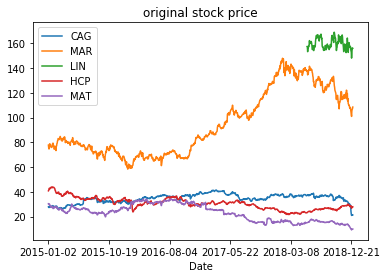

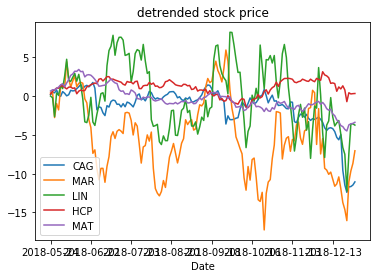

In [31]:
tickers = ['CAG','MAR','LIN','HCP','MAT']
stocks = df[tickers]
stocks.plot()
plt.title('original stock price')

stocks_ma = stocks.rolling(window=66,min_periods=1).mean()
stocks_detrended = stocks.sub(stocks_ma).dropna()

stocks_detrended.plot()
plt.title('detrended stock price')

In [32]:
model = VAR(stocks_detrended)
results = model.fit(1)
A = results.params[1:].values
eigA, _ = np.linalg.eig(A)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [33]:
results.params[1:]

,CAG,MAR,LIN,HCP,MAT
L1.CAG,0.970228,0.033116,-0.086989,0.003763,0.013275
L1.MAR,-0.005261,0.912719,-0.029486,-0.010997,0.006753
L1.LIN,0.013263,-0.018817,0.821077,-0.002672,-0.013695
L1.HCP,-0.080268,-0.012754,-0.229849,0.908703,-0.025293
L1.MAT,0.085216,0.009789,0.392259,0.036737,0.983777


- diagonal values are all close to 1, suggesting that stock price is strongly correlated to its own history.
- almost all off diagonal values are approximately 0. This could suggest that each stock is quite uncorrelated with each other.



In [34]:
print(eigA)

[0.99825478+0.j         0.85124731+0.j         0.90337502+0.05525527j
 0.90337502-0.05525527j 0.94025153+0.j        ]


The largest eigenvalue is almost 1. The smallest eigenvalue still has magnitude of 0.9. 

It could make sense to construct a portfolio using these stocks. 
- VAR(1) model fits the 5 stocks quite well so the trend of them are quite easy to track. Long and short decisions could be made depending on whether the stock price has a increasing trend or decreasing trend.
- Each stock are from different sectors, which explains why they are quite uncorrelated. This uncorrelated stocks in a portfolio could help control the risk and volatility due to diversification.

### Question 1.3.5

In [35]:
eig_df = pd.DataFrame(columns=info['GICS Sector'].unique(), index=['min eigenvalue', 'mean eigenvalue', 'max eigenvalue'])
returns = pd.DataFrame(columns=info['GICS Sector'].unique(), index=['return mean', 'return std'])

for sector in info['GICS Sector'].unique():
    
    tickers = info.loc[info['GICS Sector']==sector]['Symbol'].tolist()
    stocks = df[tickers]
    
    stocks_ma = stocks.rolling(window=66).mean()
    stocks_detrended = stocks.sub(stocks_ma).dropna()

    model = VAR(stocks_detrended)
    results = model.fit(1)

    A = results.params[1:].values
    eigA, _ = np.linalg.eig(A)
    
    eig_df[sector]['min eigenvalue'] = np.min(abs(eigA))
    eig_df[sector]['mean eigenvalue'] = np.mean(abs(eigA))
    eig_df[sector]['max eigenvalue'] = np.max(abs(eigA))

    sector_returns = stocks.pct_change().dropna().mean(1)
    returns[sector]['return mean'] = sector_returns.mean()
    returns[sector]['return std'] = sector_returns.std()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

In [36]:
eig_df.T

,min eigenvalue,mean eigenvalue,max eigenvalue
Industrials,0.371246,0.763932,0.991721
Health Care,0.0921573,0.62144,0.994153
Information Technology,0.374081,0.809351,0.992738
Communication Services,0.752488,0.926293,0.982263
Consumer Discretionary,0.447563,0.810433,0.99065
Utilities,0.0421154,0.599877,0.985648
Financials,0.152575,0.631218,1.00434
Materials,0.137838,0.621833,0.991744
Real Estate,0.763563,0.919369,0.982785
Consumer Staples,0.546458,0.852121,0.991508


- It is generally not advisable to build a portfolio with stocks all in one sector. 
- For each sector, the mean eigenvalue is usually between 0.75 to 0.95, suggesting strong correlation of stocks' prices in the same sector.
- Stocks in one sector has generally similar trend in performance, thus if the whole sector is not doing well, the portfolio is hard to do well. Diversity of stocks could help the portfolio construction to be healthy.
- For example, in 2020, COVID-19 reduces demand of oil significantly. But OPEC and Russia didn't agree a reduction in supply in time. The avalanche in oil price lead to the melt down of several stocks in energy section. If a portfolio is made up of stocks only in energy section, it would definitely suffer from heavy loss.
- However, if there is big confidence that one sector would do well, then it makes sense to gamble in that sector.

# 2 Bond Pricing

## Examples of bond pricing

### Question 2.1.1

The percentage return per annum is represented by $r$. 

####  Annual compounding

$1100 = 1000\times(1+r_{annual}) $

$ r_{annual} = 1100/1000 - 1 = 10\% $


#### Semiannual Compounding

$1100 = 1000\times(1+\frac{r_{semi}}{2})^2 $

$ r_{annual} = 2\times(\sqrt{1100/1000} - 1) = 9.76\% $


#### Monthly Compounding

$1100 = 1000\times(1+\frac{r_{month}}{12})^{12} $

$ r_{month} = 12\times((1100/1000)^{\frac{1}{12}} - 1) = 9.57\% $

#### Continuous Compounding

$ 1100 = 1000 \times exp(r)$

$ r = \ln(1100/1000) = 9.52\% $

### Question 2.1.2

$ (1+ \frac{0.15}{12})^{12} = exp(r) $

$ r = 12 \times \ln(1+ \frac{0.15}{12}) = 14.91\% $ 

### Question 2.1.3

$(10000\times exp(0.12)-10000)/ 4 = 318.7421$

USD 318.74 would be paid each quarter on a USD 10K deposit.

## Forward rates

### Question 2.2.1 not sure what to talk about yet

a) Whether I am happy or not depends on the opportunity cost of that second year: if I don't have any other way that would have give me a return of more than 9% in that second year, then I would be happy to invest for 2 years (assuming investing in the 1st year is compulsory). If I have investment opportunity (without risk) that has more than 9% return, then i would invest at most one year.

b) 5% is the kind of baseline return. Investing for longer period means reduction is liquidity thus needs higher return, so 7% for 2 years. 9% is like the marginal benefit of investing for the 2nd year. Which stragegy to choose depends at least on factors like inflation and risk associated with each strategy.

c) Advantage: higher return.

   Disadvantage: sacrificing the ability to spend the money for an extra year (liquidity). There might be extra risk in longer term.

d) It depends on the predicted interest rates for the next year. If one year interest rate could rise above 9% next year, then i might only invect for 1 year currently and invest again next year on the new (and higher) rate. Other factors include inflation and investment opportunity cost. 

## Duration of a coupon-bearing bond

### Question 2.3.1

a) Summing up the 7 numbers in the last row of table 1, we get:

duration $ = 0.0124+0.0236+0.0337+0.0428+0.0510+0.0583+6.5377 = 6.7595 $

b) modified duration $ = \frac{duration}{1+yield} = \frac{6.7595}{1+5\%} = 6.3476 $

For duration, the relationship between bond prices and movement of interest rates is assumed to be linear. However, this is not really the case in the real world. 

Actually, when interest rates rise, the price of bond would fall at an even faster rate. The relationship is not linear but like a curve, so the modified duration is used. Modified duration accounts for the convexity of the relationship between price and interest rate. For example a large drop in interest rate would leads to bigger price rise than duration (not modified) would anticipate. 

c) Both duration and modified duration are measures to approximate change in bond price for a change in yield. For a pension plan, this could be used to estimate the change in the asset value when interest rates changes. This enables relavent impact to be evaluated and risk to be calculated. Duration assumes a linear model and works when change in yield is small. When the yield moves in a bigger strike, it is better to use modified duration, which accounts for the convexity involved in the relationship. 

## CAPM and APT

### Question 2.4.1

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
df = pd.read_csv(r'fsp_case_31_BSD.csv', index_col=0, header=[0,1])
dates = df.index
date_axis = [dt.datetime.strptime(d, '%Y-%m-%d').date() for d in dates]

In [38]:
Rmt = df['ret'].mean(axis=1)
# market returns per day , average (company returns)
# print(Rmt) 
# sanity check
# mean calculation limited to return columns makes it reasonable

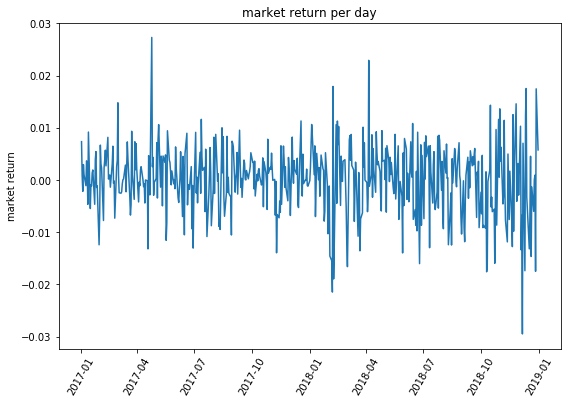

In [39]:
plt.figure(figsize=(9,6))
plt.plot(date_axis, Rmt)
plt.xticks(rotation=60)
plt.ylabel('market return')
plt.title('market return per day')
plt.show()

### Question 2.4.2

\begin{equation}
    E(R_i)=R_f + \beta_i(E(R_m)-R_f)
\end{equation}

- $E(R_i)$ is the expected return on the capital asset
- $R_f$ is the risk free interest rate
- $\beta_i$ is the sensitivity of the expected asset returns to the expected excess market returns.
- $E(R_m)$ is the expected return of the market

\begin{equation}
    \beta_i = \frac{Cov(R_i,R_m)}{Var(R_m)}
\end{equation}

- It is easier to see the output of rolling Beta estimation from the two plots below. More details could be made by directly inquiry of the matrix Beta.
- But it is quite obvious that the estimated value of Beta is quite volatile. This suggests that this method to measure sensitivity could have improvements.

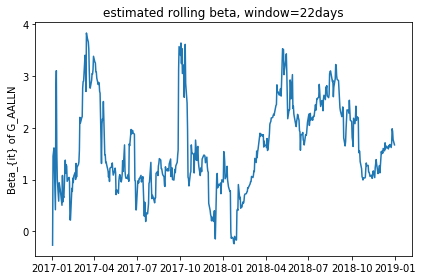

0.7270596078948313


In [40]:
Beta_equ= df['ret'].rolling(22, min_periods=1).cov(Rmt).div(Rmt.rolling(22, min_periods=1).var(), axis=0)
Beta_equ.index = pd.to_datetime(Beta_equ.index)
plt.plot(Beta_equ.index, Beta_equ['G_AALLN'])
plt.ylabel('Beta_{it} of G_AALLN')
plt.title('estimated rolling beta, window=22days')
plt.tight_layout()
plt.show()
print(Beta_equ['G_AALLN'].var())

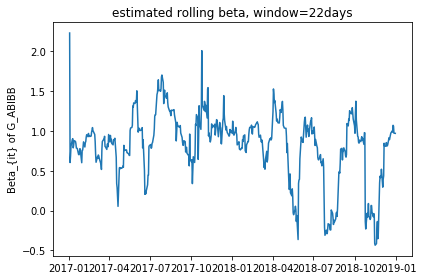

0.18043947836479038


In [41]:
Beta_equ.index = pd.to_datetime(Beta_equ.index)
plt.plot(Beta_equ.index, Beta_equ['G_ABIBB'])
plt.ylabel('Beta_{it} of G_ABIBB')
plt.title('estimated rolling beta, window=22days')
plt.tight_layout()
plt.show()
print(Beta_equ['G_ABIBB'].var())

### Question 2.4.3

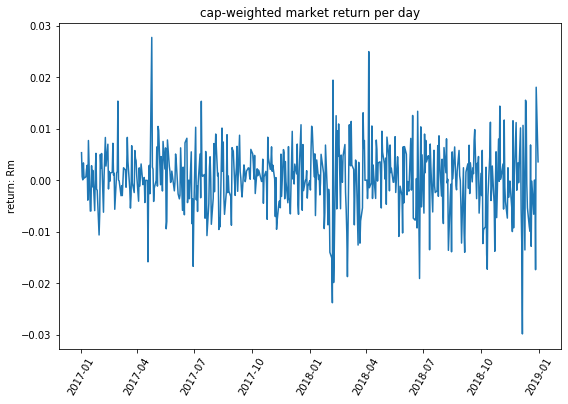

In [42]:
Rm = (df['mcap']*df['ret']).sum(axis=1)/df['mcap'].sum(axis=1)

plt.figure(figsize=(9,6))
plt.plot(date_axis, Rm)
plt.xticks(rotation=60)
plt.ylabel('return: Rm')
plt.title('cap-weighted market return per day')
plt.show()

In [43]:
Rmt.var()

4.333853543667499e-05

In [44]:
Rm.var()

4.304055526908943e-05

In [45]:
Rmt.mean()

4.602024463006045e-05

In [46]:
Rm.mean()

0.00019714725583991848

Compared to market return, capital weighted market return has almost the same variance but mean is approxiamtely 5 times bigger.

$\sum_i mcap_i$ represents the total market capital of the 157 companies on that day. 

$\frac{mcap_i}{\sum_i mcap_i}$ represents the propotion of capital or "market share" of company i on that day. 

This would be the weight that multiplies to the return of company i on that day to get the cap-weighted market return of that company on that day.

Overall, the bigger market capital an asset has, the more influence of its return is on the cap-weighted market return.

### Question 2.4.4

In [47]:
Beta_cap = df['ret'].rolling(22, min_periods=1).cov(Rm).div(Rm.rolling(22, min_periods=1).var(), axis=0)
# cap weighted beta 

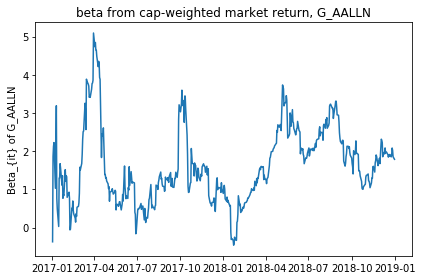

0.9786557778455062


In [48]:
Beta_cap.index = pd.to_datetime(Beta_cap.index)
plt.plot(Beta_cap.index, Beta_cap['G_AALLN'])
plt.ylabel('Beta_{it} of G_AALLN')
plt.title('beta from cap-weighted market return, G_AALLN')
plt.tight_layout()
plt.show()
print(Beta_cap['G_AALLN'].var())

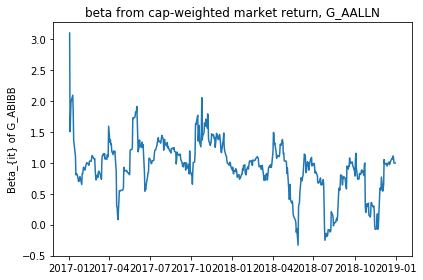

0.18334740407724323


In [49]:
Beta_cap.index = pd.to_datetime(Beta_cap.index)
plt.plot(Beta_cap.index, Beta_cap['G_ABIBB'])
plt.ylabel('Beta_{it} of G_ABIBB')
plt.title('beta from cap-weighted market return, G_AALLN')
plt.tight_layout()
plt.show()
print(Beta_cap['G_ABIBB'].var())

In [50]:
table = Beta_cap/Beta_equ
table.mean().mean()

1.7681705785320903

- For most companies in most periods, equally weighted beta is different from cap-weighted beta. 
- The rolling beta calculated from cap-weighted market return in average has larger value.
- For each asset, the two types of rolling beta outcome follows the same trend.
- Cap-weighted market return and beta should be a more accurate measure of the sensitivity (of the expected excess asset returns to the expected excess market return).

## Capital Asset Pricing Model (CAPM) and Arbitrage Pricing Theory (APT)

In [51]:
ri = df['ret'].copy()
ri.index = pd.to_datetime(ri.index)
ri = ri.loc[Beta_cap.index] 

bm = Beta_cap

bs = df['mcap'].copy()
bs.index = pd.to_datetime(bs.index)
bs = np.log(bs.loc[Beta_cap.index])

In [52]:
Rm = pd.Series(dtype='float64',index=ri.index)
Rs = pd.Series(dtype='float64',index=ri.index)
a = pd.Series(dtype='float64',index=ri.index)
e = pd.DataFrame(dtype='float64',index=ri.index, columns=ri.columns)

for t in ri.index:
    
    r = np.nan_to_num(ri.loc[t].values.reshape(-1,1))
    xm = bm.loc[t].values.reshape(-1,1)
    xs = bs.loc[t].values.reshape(-1,1)
    ones = np.ones((xs.shape))
    X = np.nan_to_num(np.hstack((ones,xm,xs)))

    b = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(r)
    
    a[t] = float(b[0])
    Rm[t] = float(b[1])
    Rs[t] = float(b[2])
    e.loc[t] = (r-X.dot(b)).reshape(1,-1)


/opt/anaconda3/lib/python3.7/site-packages/numpy/linalg/linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


Text(0.5, 1.0, 'Rs')

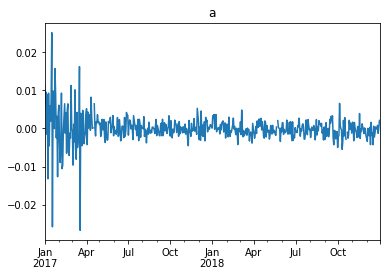

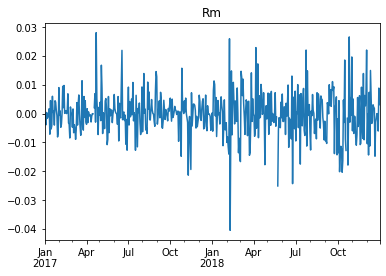

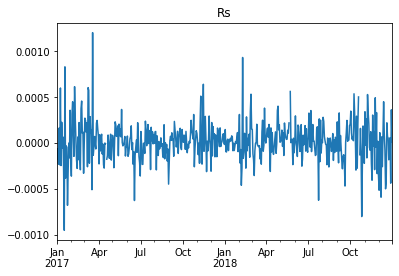

In [53]:
plt.figure()
a.plot()
plt.title('a')

plt.figure()
Rm.plot()
plt.title('Rm')

plt.figure()
Rs.plot()
plt.title('Rs')

In [54]:
print('var(a): ',a.var())
print('var(Rm): ',Rm.var())
print('var(Rs): ',Rs.var())

var(a):  1.2747689995869197e-05
var(Rm):  5.654191938800993e-05
var(Rs):  4.715238550548781e-08


- a and Rm has similar level of magnitude. but magnitude of Rs is much smaller.
- Rm has variance 5 times of that of a. Variance of Rs is much smaller.
- This implies market factor is more important/influential than size factor.

In [55]:
time_correlation = pd.Series(dtype='float64', index=e.columns)
for company in e.columns:
    time_correlation[company]=e[company].corr(ri[company])

In [56]:
time_correlation

cmp_id
G_AALLN     0.830800
G_ABIBB     0.819595
G_ACFP      0.825074
G_ADENVX    0.758567
G_ADLERR    0.893403
              ...   
G_VLVY      0.806910
G_VOD       0.807672
G_VW        0.742681
G_WKLNA     0.770646
G_WPPLN     0.890032
Length: 157, dtype: float64

Text(0, 0.5, 'magnitude')

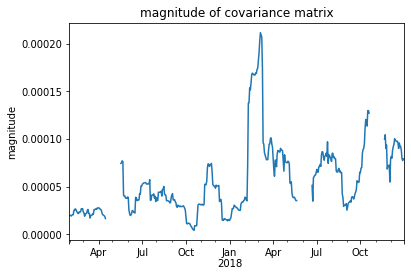

In [57]:
R = pd.DataFrame(columns=['Rm', 'Rs'])
R['Rm']=Rm
R['Rs']=Rs

R_covs = []
M = 22
for t in R.index[M-1:]:
    R_tmp = R[:t].iloc[-M:]
    R_cov = np.cov(R_tmp.T)
    R_covs.append(R_cov)

R_covs=np.array(R_covs)

magnitude = pd.Series(dtype='float64',index=R.index[M-1:])

for i in range(1, R_covs.shape[0]):
    R_cov = R_covs[i]
    magnitude[i]=(np.linalg.norm(R_cov))
    

magnitude.plot()
plt.title('magnitude of covariance matrix')
plt.ylabel('magnitude')

- Magnitude of covariance matrix changes quite a lot. So it is quite unstable.
- This could suggests that the relative importance of the two factors are changing through time.

In [58]:
E = np.nan_to_num(e.T)
cov_E = np.cov(E)

eigvals, eigvecs = np.linalg.eigh(cov_E)
eigvals
print('percentage of variance explained by the first Principal Component:', round(100*eigvals[-1]/sum(eigvals),3), '%')

percentage of variance explained by the first Principal Component: 7.076 %


- The 1st priciple component is often associated with the long-only portfolio.
- It is also the greatest source of variance.
- It could be interpreted by the positive drift usually seen in stock markets in the long run (long term general market trend)
- In other words, approximately 7% of the specific returns comes from the long term growth.

# Portfolio Optimization

## Adaptive Minimum Variance Portfolio Optimization

### Lagrange Optimization

Minimum Variance Portfolio optimization problem formulation:

\begin{equation}
 \min_{\textbf{w}} \frac{1}{2}\textbf{w}^{T}\textbf{C}\textbf{w}
\end{equation}
\begin{equation}
    s.t. \textbf{w}^{T}\textbf{1}=1
\end{equation}

- $\textbf{w}$ represents the weight vector assigned to assets in the portfolio; entries could be negative, representing shorting an asset.
- The total found availabe to invest is limited, so it is constrained that values in weight vector adds up to one;
- $\textbf{C}$ represents the covariance matrix of all assests: $\textbf{C} = E\{(\textbf{r}[t]-\mu)(\textbf{r}[t]-\mu)^T \}$ demonstrating the correlation information;
- $ \mu = E\{\textbf{r}[t] \}$ is the vector for mean return of each asset across time;
- return of the portfolio at time t is given by: $\bar{r}[t]= \textbf{w}^T \textbf{r}[t]$;
- expected return: $\bar{\mu}=E\{\textbf{r}[t]\}=\textbf{w}^T \mu$;
- Variance of the portfolio is given by: 
$ \sigma^2 = E\{ (\bar{r}[t]-\bar{\mu})^2\}=\textbf{w}^{T}\textbf{C}\textbf{w}$;
- a vector of ones is represented by: $\textbf{1}$.

Minimize Lagrangian L with respect to weight $\textbf{w}$ and multiplier $\lambda$:
$
L = \frac{1}{2}\textbf{w}^{T}\textbf{C}\textbf{w} - \lambda(\textbf{w}^{T}\textbf{1}-1) 
$

$\frac{\partial L}{\partial \textbf{w}} = \textbf{C}\textbf{w} - \lambda \textbf{1} = 0$, thus 
$\textbf{w}=\lambda \textbf{C}^{-1}\textbf{1}$

$\frac{\partial L}{\partial \lambda } = \textbf{w}^{T}\textbf{1}-1 = 0 $, thus $\textbf{w}^{T}\textbf{1}=1$

Combining the above 2 line: $(\lambda \textbf{C}^{-1}\textbf{1})^T \textbf{1} = 1$

$ \lambda \textbf{1}^T (C^{-1})^T \textbf{1} = 1$

$ \lambda = \frac{1}{\textbf{1}^T (C^{-1})^T \textbf{1}} $

Sanity check: $\textbf{1}^T (C^{-1})^T \textbf{1}$ is a horizontal vector times matrix times vector, which will give a scalar; $\lambda$ needs to be a scalar and one divided by scalr indeed gives a scalar.

Bring $\lambda$ into portforlio weight: 
$ \textbf{w}_{opt} = \lambda \textbf{C}^{-1}\textbf{1} = \frac{\textbf{C}^{-1}\textbf{1}}{\textbf{1}^T (C^{-1})^T \textbf{1}}$

$\sigma^{2}_{theoretical}= \textbf{w}_{opt}^T \textbf{C} \textbf{w}_{opt} = (\lambda \textbf{C}^{-1}\textbf{1})^T \textbf{C} (\lambda \textbf{C}^{-1}\textbf{1}) = \lambda^2 \textbf{1}^T (C^{-1})^T \textbf{1} = \frac{1}{\textbf{1}^T (C^{-1})^T\textbf{1}} $ 

### Equally weighted portfolio and minimum variance portfolio

Text(0, 0.5, 'Returns')

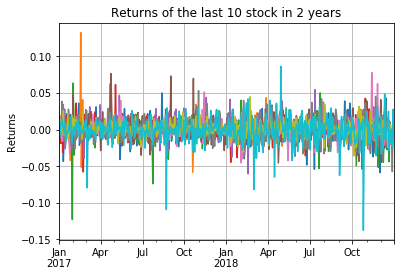

In [59]:
# Import relevant libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('fsp_case_31_BSD.csv', index_col=0,header=[0 ,1]) 
rt = df['ret'].copy().dropna(1) 
rt.index = pd.to_datetime(rt.index) 
rt = rt.iloc[:,-10:] 
# getting the last 10 stock

rt.plot(title='Returns of the last 10 stock in 2 years', grid=True, legend=False)
plt.ylabel('Returns')

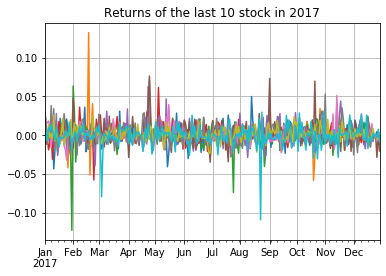

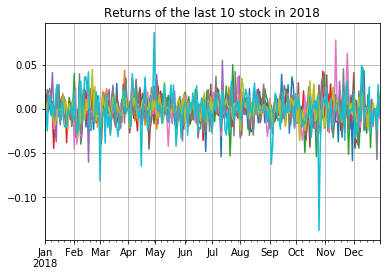

In [60]:
rt_training = rt.iloc[:int(rt.shape[0]/2), :]
rt_testing = rt.iloc[int(rt.shape[0]/2):, :]
rt_training.plot(title='Returns of the last 10 stock in 2017', grid=True, legend=False)
rt_testing.plot(title='Returns of the last 10 stock in 2018', grid=True, legend=False)
# use the data in year 2017 as training
# year 2018 would be testing data 

#### Equally weighted portfolio

The vector $\textbf{w}$ would be have ten $\frac{1}{10}$ as entries.

$\bar{r}[t]= \textbf{w}^T \textbf{r}[t]$ is equivalent to the mean across all stockes.

Text(0, 0.5, 'Returns')

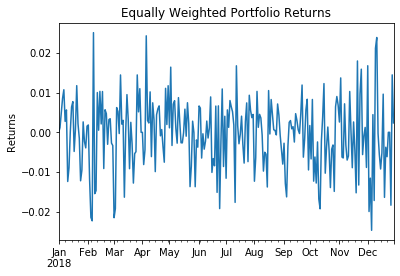

In [61]:
rt_ew = rt_testing.mean(1) # portfolio return with equal weight
rt_ew.plot(title='Equally Weighted Portfolio Returns')
plt.ylabel('Returns')

Text(0, 0.5, 'Cumulative Returns')

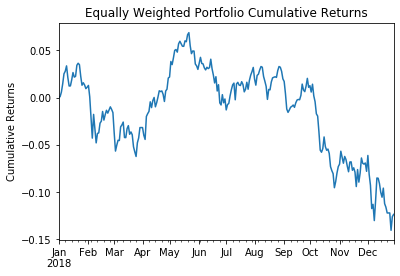

In [62]:
rt_ew.cumsum().plot(title='Equally Weighted Portfolio Cumulative Returns')
plt.ylabel('Cumulative Returns')

In [63]:
Performance_EW = pd.Series(dtype='float64')
Performance_EW['Mean Return']=rt_ew.mean() 
# or expected return
Performance_EW['Cumulative Return']=rt_ew.cumsum()[-1]
# value at the last day
Performance_EW['Vol']=rt_ew.std()
Performance_EW['Variance']=rt_ew.var()
Performance_EW['Sharpe']=rt_ew.mean()/rt_ew.std()
Performance_EW

Mean Return         -0.000473
Cumulative Return   -0.123503
Vol                  0.008907
Variance             0.000079
Sharpe              -0.053126
dtype: float64

It is clear equally weighted portfolio performs badly:
- mean return is negative;
- cumulative return is -12.35%, which is losing a lot in only one year; 
- Thus no one will want this portfolio what so ever, making the Sharpe ratio kind of irrelavent;
- sharpe ratio has very small absolute value, suggesting even sign is ignored, there is very limited return for each unit of risk tasken. 

#### Minimum Variance Portfolio

In [64]:
# Compute the minimum variance portfolio weights from the training data 
ones = np.ones((10,1))
C = rt_training.cov() #should be a 10x10 matrix
Lambda = 1/(ones.T.dot(np.linalg.inv(C).T).dot(ones))
w_opt = Lambda*(np.linalg.inv(C).dot(ones))
w_opt = w_opt.reshape(10,1)

In [65]:
rt_mv_training = rt_training.dot(w_opt)[0]
Performance_MV_tr= pd.Series(dtype='float64')
Performance_MV_tr['Mean Return']=rt_mv_training.mean() 
Performance_MV_tr['Cumulative Return']=rt_mv_training.cumsum()[-1]
Performance_MV_tr['Vol']=rt_mv_training.std()
Performance_MV_tr['Variance']=rt_mv_training.var()
Performance_MV_tr['Sharpe']=rt_mv_training.mean()/rt_mv_training.std()
Performance_MV_tr

Mean Return          0.000958
Cumulative Return    0.249062
Vol                  0.005349
Variance             0.000029
Sharpe               0.179072
dtype: float64

Assuming that the future could be accurately predicted, minimum variance portfolio shows a really good annul cumulative return (in this case only, with this specific data set), although we know it is unrealistic. Sharpe ratio suggest that with each percent of profit, more than 5.5 percent of volatility needs to be taken. This suggests this still could be a high risk portfolio.

Mean Return         -0.000451
Cumulative Return   -0.117582
Vol                  0.009051
Variance             0.000082
Sharpe              -0.049774
dtype: float64

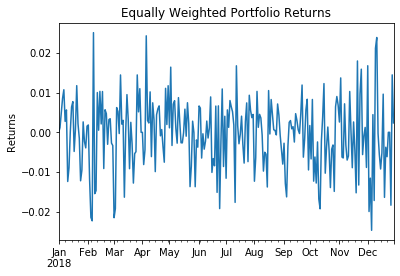

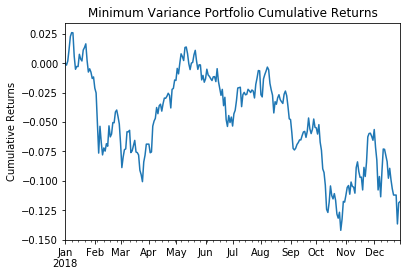

In [66]:
# return of the minimum variance portfolio 
# with weight vector from training data
# evaluate performace on test data
rt_mv = rt_testing.dot(w_opt)[0]
# return of the minimum variance portfolio in year 2018
rt_ew.plot(title='Equally Weighted Portfolio Returns')
plt.ylabel('Returns')
plt.figure()
rt_mv.cumsum().plot(title='Minimum Variance Portfolio Cumulative Returns')
plt.ylabel('Cumulative Returns')

Performance_MV= pd.Series(dtype='float64')
Performance_MV['Mean Return']=rt_mv.mean() 
Performance_MV['Cumulative Return']=rt_mv.cumsum()[-1]
Performance_MV['Vol']=rt_mv.std()
Performance_MV['Variance']=rt_mv.var()
Performance_MV['Sharpe']=rt_mv.mean()/rt_mv.std()
Performance_MV

Cumulative return is still negative, suggesting loss in the year. 
Minimum variance portfolio optimization minimize the volatility of the portfolio rather than maximizing the profit. So the negative cumulative return of minimum variance portfolio, with testing data, is not so surprising.

In [67]:
rt_ew_tr = rt_training.mean(1)
rt_ew_tr.var()
# variance of equally weighted portfolio, with training data

3.749498028642652e-05

| variance of portfolio return| 17-18 training | 18-19 testing |
| ------------- |-------------| -----|
| equally weighted | 3.7e-5 | 7.9e-5
| minimum variance | 2.9e-5 | 8.2e-5

The first row of the table shows the variance of return of equally weighted portfolio in the two years. The second row shows the variance of return of minimum variance portfolio, with weight vector computed using training data in year 2017. It can be observed, that in year 2017, training data with minimum variance indeed shows a lower return variance. However, when applying the minimum variance weight vector obtained from training data to testing data, variance of portfolio retrun is not reduced, compared to equally weighted portfolio. This suggests that the optimal weight vector should not be static for such a long period like a year, and needs to be updated dynamically. 

In [68]:
C_training = rt_training.cov()
C_testing = rt_testing.cov()
# theoretical
var_training = w_opt.T.dot(C_training).dot(w_opt)
var_testing = w_opt.T.dot(C_testing).dot(w_opt)
print(var_training)
print(var_testing)

[[2.86162941e-05]]
[[8.1919958e-05]]


The theoretical return variance of minimum variance portfolio, calculated using equation from part 1, is equal to the variances above, obtained from data calcualtion.

### Adaptive Time Varying Minimum Variance Portfolio


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7605: RuntimeWarning: Degrees of freedom <= 0 for slice
  baseCov = np.cov(mat.T)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Text(0, 0.5, 'Daily Return')

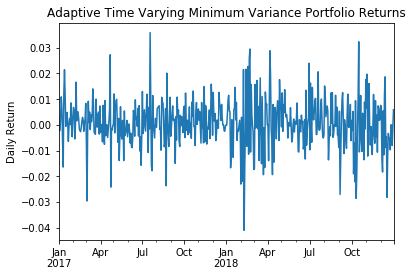

In [69]:
# Compute optimal portfolio
def Get_W_opt (C):
    
    ones = np.ones((10,1))
    Lambda = 1/(ones.T.dot(np.linalg.inv(C).T).dot(ones))
    w_opt = Lambda*(np.linalg.inv(C).dot(ones))
    w_opt = w_opt.reshape(10,1)
    
    return w_opt

rt_atvmv = pd.Series(dtype='float64') # Initialize the series to store portfolio returns
W_opts = [] # to store all w_opt[t] estimates
M = 21 # average trading days per month, used as window size

for t in rt.index: # update weight vector every trading day, and calculate daily porfolio return
    rt_tmp = rt[:t].iloc[-M-1:-1] 
    cov_tmp = rt_tmp.cov() 
    W_opt = Get_W_opt(cov_tmp) 
    W_opts.append(W_opt) 
    rt_atvmv[t] = rt.loc[t].dot(W_opt)[0]
    
plt.figure()
rt_atvmv.plot(title='Adaptive Time Varying Minimum Variance Portfolio Returns')
plt.ylabel('Daily Return')


Text(0, 0.5, 'Cumulative Return')

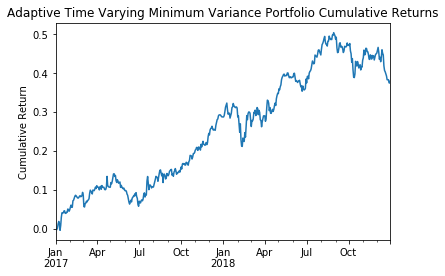

In [70]:
plt.figure()
rt_atvmv.cumsum().plot(title='Adaptive Time Varying Minimum Variance Portfolio Cumulative Returns')
plt.ylabel('Cumulative Return')

In [71]:
Performance_atvmv = pd.Series(dtype='float64')
Performance_atvmv['Mean Return']=rt_atvmv.mean()
Performance_atvmv['Cumulative Return']=rt_atvmv.cumsum()[-1]
Performance_atvmv['Volatility']=rt_atvmv.std()
Performance_atvmv['Variance']=rt_atvmv.var()
Performance_atvmv['Sharpe']=rt_atvmv.mean()/rt_atvmv.std()

Performance_atvmv

Mean Return          0.000733
Cumulative Return    0.380458
Volatility           0.009241
Variance             0.000085
Sharpe               0.079327
dtype: float64

Using a trading month as window, the adaptive minimum variance portfolio has a fantastic cumulative return of 38% after 2 years. This comes at the price of potentially a higher total transaction cost. For window of 21 days, the variance shows no improvement from static minimum variance portfolio.

However, when window size is adjusted, there is two interesting observation. First, the smaller the window, the higher the cumulative return over 2 year. Second, the wider the window, the smaller the variance will become. The code and results below also suggests that a long enough period (personally suggest a quarter or 63 trading days) would facilitate more accurate weight vector update. The values are summerised in the table below. 

|                 | Week | Month | Quarter | Year  |
|-----------------|----- |-------|---------|------ |
|Cumulative return|860%  |38.0%  |31.8%    |17.2%  |
|Return variance  |0.0927|8.5e-5 |5.74e-5  |5.33e-5|

In [72]:
rt_atvmv2 = pd.Series(dtype='float64') 
W_opts2 = [] 
M = 7 # average trading days per week
for t in rt.index: 
    rt_tmp = rt[:t].iloc[-M-1:-1] 
    cov_tmp = rt_tmp.cov() 
    W_opt = Get_W_opt(cov_tmp) 
    W_opts2.append(W_opt) 
    rt_atvmv2[t] = rt.loc[t].dot(W_opt)[0]
profit_week = rt_atvmv2.cumsum()[-1]
print(profit_week) # dam insane
var_week = rt_atvmv2.var()
print(var_week)

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7605: RuntimeWarning: Degrees of freedom <= 0 for slice
  baseCov = np.cov(mat.T)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


8.601773529393396
0.09273511592024508


In [73]:
rt_atvmv3 = pd.Series(dtype='float64') 
W_opts3 = [] 
M = 63 # average trading days each quarter
for t in rt.index: 
    rt_tmp = rt[:t].iloc[-M-1:-1] 
    cov_tmp = rt_tmp.cov() 
    W_opt = Get_W_opt(cov_tmp) 
    W_opts3.append(W_opt) 
    rt_atvmv3[t] = rt.loc[t].dot(W_opt)[0]
profit_quarter = rt_atvmv3.cumsum()[-1]
print(profit_quarter)
var_quarter = rt_atvmv3.var()
print(var_quarter)

0.3177284795474613
5.7378897310627716e-05


In [74]:
rt_atvmv4 = pd.Series(dtype='float64') 
W_opts4 = [] 
M = 253 # average trading days each year
for t in rt.index: 
    rt_tmp = rt[:t].iloc[-M-1:-1] 
    cov_tmp = rt_tmp.cov() 
    W_opt = Get_W_opt(cov_tmp) 
    W_opts4.append(W_opt) 
    rt_atvmv4[t] = rt.loc[t].dot(W_opt)[0]
profit_year = rt_atvmv4.cumsum()[-1]
print(profit_year)
var_year = rt_atvmv4.var()
print(var_year)

0.17155076386531032
5.326354201203756e-05


There definitly exists different methods to compute the sample covariance matrix.

Currently, for calculation of both mean/expected return and covariance matrix, data in the window with different date are treated with equal significance, which is a rectangular window. But naturally, more recent history is more relevent. So the window function can be an exponentially (or linearly) decreasing function. 

Another aspect to consider is the fraction $\frac{1}{M}$ in equation 18 in coursework question sheet. This might be replaced by $\frac{1}{M-1}$. The reason is, that mean used in equation 18 is also a sample estimate and could have a bias. So when estimating the emperical covariance matrix, using an estimated mean, $\frac{1}{M-1}$ could also be used to corret the bias. The exception is that, if assuming all the assets data are normally distributed, this could be unnecessary.

# Robust Statistics and Non-Linear Methods

## Data Import and Exploratory Data Analysis

### Key Descriptive Statistics

In [75]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import iqr
from statsmodels.robust.scale import mad 

AAPL = pd.read_csv('AAPL.csv', index_col=0) 
AAPL.index = pd.to_datetime(AAPL.index)

IBM = pd.read_csv('IBM.csv', index_col=0) 
IBM.index = pd.to_datetime(IBM.index)

JPM = pd.read_csv('JPM.csv', index_col=0) 
JPM.index = pd.to_datetime(JPM.index)

DJI = pd.read_csv('DJI.csv', index_col=0) 
DJI.index = pd.to_datetime(DJI.index)

all_data = {'AAPL':AAPL, 'IBM':IBM, 'JPM':JPM, 'DJI':DJI} 

Tickers = ['AAPL','IBM','JPM','DJI'] 
Columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
Stats = ['Mean', 'Median', 'StdDev', 'MAD', 'IQR', 'Skew', 'Kurtosis'] 
statistics_df = pd.DataFrame(index=Stats, columns=Columns) 
all_stats = {'AAPL':statistics_df.copy(), 'IBM':statistics_df.copy(), 'JPM':statistics_df.copy(), 'DJI':statistics_df.copy()} 

- In this question, datas of 4 tickers are explored: 3 stocks (AAPL, IBM and JPM) and 1 index (DJI); 
- For each ticker, there are 6 columns of data: Open, High, Low, Close, Adj Close prices plus Volume;
- For each column of each ticker, 7 statistics are calculated: mean, median (measures of central tendency), standard deviation, median absolute deviation, interquartile range (measure of dispersion), skew (measure of asymmetry) and kurtosis (measure of distribution tails);


In [76]:
for ticker in Tickers:
    data = all_data[ticker].copy()
    all_data[ticker]['Returns'] = all_data[ticker]['Adj Close'].pct_change()
    
    for DataColumn in Columns:
        col = data[DataColumn]
        
        all_stats[ticker][DataColumn]['Mean'] = col.mean()
        all_stats[ticker][DataColumn]['Median'] = col.median()
        all_stats[ticker][DataColumn]['StdDev'] = col.std()
        all_stats[ticker][DataColumn]['MAD'] = mad(col)
        all_stats[ticker][DataColumn]['IQR'] = iqr(col)
        all_stats[ticker][DataColumn]['Skew'] = col.skew()
        all_stats[ticker][DataColumn]['Kurtosis'] = col.kurtosis()
        
    print (ticker)
    print (all_stats[ticker])
    print ()

AAPL
              Open      High       Low     Close Adj Close       Volume
Mean       187.687   189.562   185.824   187.712   186.174  3.27048e+07
Median      186.29     187.4    184.94    186.12   184.352   2.9184e+07
StdDev     22.1456   22.2816   22.0088   22.1607   21.9047  1.41797e+07
MAD        23.5585   23.1434    23.603   23.6327   22.9448  1.12291e+07
IQR             36     36.34     36.06    36.755   35.6854  1.63117e+07
Skew      0.259917  0.300385  0.220489  0.263849   0.29077      1.74332
Kurtosis -0.912594 -0.924602 -0.917632 -0.932425 -0.928017      4.35318

IBM
              Open      High       Low     Close Adj Close       Volume
Mean       138.454   139.492   137.329   138.363   134.903  5.19894e+06
Median      142.81    143.99    142.06    142.71   138.566   4.2379e+06
StdDev     12.1143   11.9131   12.2046   12.0281   10.6716  3.32896e+06
MAD        7.81332   7.87261   7.69471   7.75403    6.6621  1.36503e+06
IQR          15.38     14.72     16.34    15.505   14.

Some more observations could be made from the above table, consistent for all 4 tickers and across all 5 price columns:
- Mean and Median are close in value, but could not be considered are approximatly the same. 
- As expected, standard deviation differs from median absolute deviation. 
- from the above two observations there could be two guesses:
    - data is not perfectly normally distributed
    - there exists outliers.
- The sign of skewness and kurtosis of each column is consistent in a ticker.


### Histogram and PDF of adj.close and 1-day return

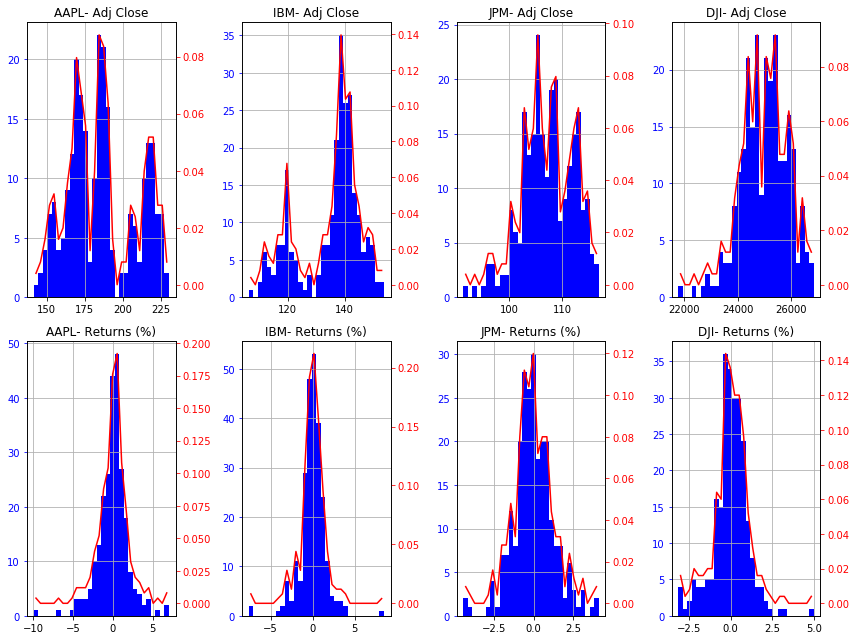

In [77]:
fig, ax = plt.subplots(2,4)   
i=0
for ticker in Tickers:
    price = all_data[ticker]['Adj Close'].dropna()

    tmp = ax[0][i].hist(price, bins=30, color='b') 
    ax[0][i].tick_params(axis='y', colors='b')

    tmp_ax = ax[0][i].twinx() 
    tmp_ax.plot(tmp[1][1:]-0.5*(tmp[1][1]-tmp[1][0]), tmp[0]/sum(tmp[0]), color='r')
    tmp_ax.tick_params(axis='y', colors='r')

    ax[0][i].set_title(ticker+'- Adj Close')
    ax[0][i].grid()
    
    ret = 100*all_data[ticker]['Returns'].dropna()

    tmp = ax[1][i].hist(ret, bins=30, color='b')
    ax[1][i].tick_params(axis='y', colors='b')

    tmp_ax = ax[1][i].twinx() 
    tmp_ax.plot(tmp[1][1:]-0.5*(tmp[1][1]-tmp[1][0]), tmp[0]/sum(tmp[0]), color='r')
    tmp_ax.tick_params(axis='y', colors='r')

    ax[1][i].set_title(ticker+'- Returns (%)')
    ax[1][i].grid()
    
    i=i+1;
    
fig.set_size_inches(12,9)
fig.tight_layout()

- The figure above shows the histogram (blue) and probability density function (red) of the adj-close price and returns of the 4 tickers. 
- As mentioned in the 1st part of this coursework, the price data of tickers may not show a normal distribution, but simple return could have a more Guassian distribution. In each pdf of 4 tickers's adjusted closing price, more than 1 peak could be identified. In the returns figure, although the classic bell shape is not very visible as they are squeezed, centering around mean of approximatly 0 is manifest.
- However, it is clear that on each of the 4 histogram of returns, both bins on two sides of extremes are not empty. Whether they are anomalies or outliers are unclear at this stage.
- If analysis needs to be performed directly on adj.close price, statistics like median and median adjusted deviation should be used. Means and standard deviation could still be used on returns.

### Anomaly Detection: Z-score based methods - rolling mean and median

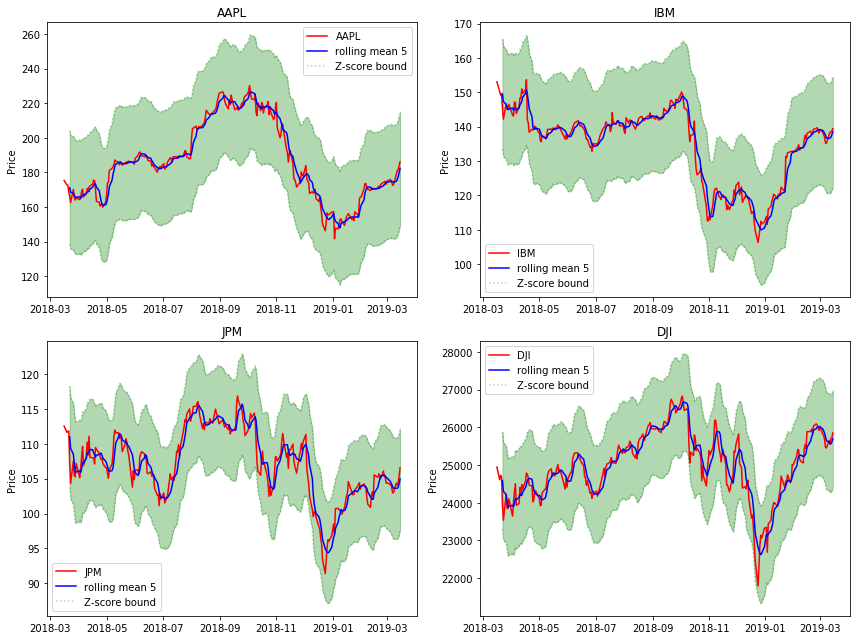

In [78]:
# mean and StdDev
Adj_Close = pd.DataFrame(columns=Tickers)

fig, axis = plt.subplots(2,2) 

for ticker in Tickers:
    Adj_Close[ticker] = all_data[ticker]['Adj Close'].copy()

for ticker in Tickers:
    
    price = Adj_Close[ticker].copy()
    price_ma = price.rolling(5).mean() # 5 day window
    price_high = price_ma+1.5*price.std() # z-score bounds
    price_low = price_ma-1.5*price.std()
    
    if ticker == Tickers[0]: 
        pic = axis[0][0]
    if ticker == Tickers[1]: 
        pic = axis[0][1]
    if ticker == Tickers[2]: 
        pic = axis[1][0]
    if ticker == Tickers[3]: 
        pic = axis[1][1]
    
    pic.plot(price, 'r-')
    pic.plot(price_ma, 'b-')
    pic.plot(price_high, 'g:', alpha=0.3)
    pic.plot(price_low, 'g:', alpha=0.3)
    pic.fill_between(price.index, price_high, price_low, color='g', alpha=0.3) 
    pic.set_title(ticker)
    pic.set_ylabel('Price')
    pic.legend([ticker, 'rolling mean 5', 'Z-score bound']) 

fig.set_size_inches(12,9)
fig.tight_layout()

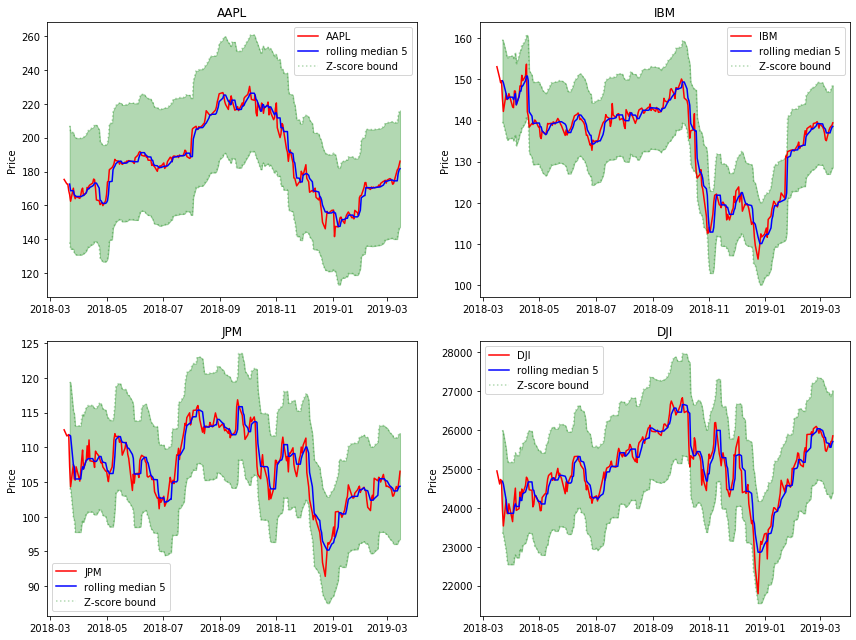

In [79]:
# median and mad
Adj_Close = pd.DataFrame(columns=Tickers)

fig, axis = plt.subplots(2,2) 

for ticker in Tickers:
    Adj_Close[ticker] = all_data[ticker]['Adj Close'].copy()

for ticker in Tickers:
    
    price = Adj_Close[ticker].copy()
    price_ma = price.rolling(5).median() 
    price_high = price_ma+1.5*mad(price) 
    price_low = price_ma-1.5*mad(price)
    
    if ticker == Tickers[0]: 
        pic = axis[0][0]
    if ticker == Tickers[1]: 
        pic = axis[0][1]
    if ticker == Tickers[2]: 
        pic = axis[1][0]
    if ticker == Tickers[3]: 
        pic = axis[1][1]
    
    pic.plot(price, 'r-')
    pic.plot(price_ma, 'b-')
    pic.plot(price_high, 'g:', alpha=0.3)
    pic.plot(price_low, 'g:', alpha=0.3)
    pic.fill_between(price.index, price_high, price_low, color='g', alpha=0.3) 
    pic.set_title(ticker)
    pic.set_ylabel('Price')
    pic.legend([ticker, 'rolling median 5', 'Z-score bound']) 

fig.set_size_inches(12,9)
fig.tight_layout()

- The above two figures shows the z-score based method to detect anomaly. 
    - The first one uses mean and standard deviation. 
    - The second one uses median and median adjusted deviation.  
- The rolling mean or median serve as a moving average filter, which smooths the price curve. This could also be views as a low pass filter. In this sense the two methods are almost the same.
- The second one using median and mad could be a tighter method compared to mean and std. It is more obvious to look at subplot for IBM, between October and December 2018. There is a big price slum in this period, and in mean-std graph, the price curve (red) is comfortable inside the z-score bound (green shade).  In median-mad graph, price curve touches 3 times the lower bound, which introduces potential outlier identificaiton or potential false alarm.

### Introducing outlier points

In [80]:
Adj_Close = pd.DataFrame(columns=Tickers)
for ticker in Tickers:
    Adj_Close[ticker] = all_data[ticker]['Adj Close'].copy()
Outlier_Dates = ['2018-05-14', '2018-09-14', '2018-12-14', '2019-01-14']
for ticker in Tickers:
    max_adj_close = Adj_Close[ticker].max()
    for date in Outlier_Dates:
        Adj_Close[ticker][date]=1.2*max_adj_close

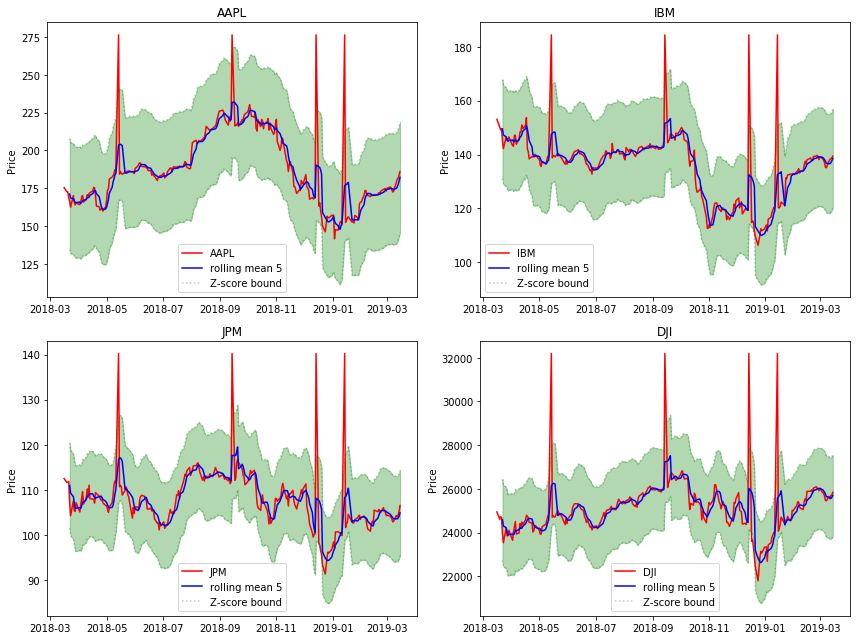

In [81]:
fig, axis = plt.subplots(2,2) 
for ticker in Tickers:
    
    price = Adj_Close[ticker].copy()
    price_ma = price.rolling(5).mean() 
    price_high = price_ma+1.5*price.std() 
    price_low = price_ma-1.5*price.std()
    
    if ticker == Tickers[0]: 
        pic = axis[0][0]
    if ticker == Tickers[1]: 
        pic = axis[0][1]
    if ticker == Tickers[2]: 
        pic = axis[1][0]
    if ticker == Tickers[3]: 
        pic = axis[1][1]
    
    pic.plot(price, 'r-')
    pic.plot(price_ma, 'b-')
    pic.plot(price_high, 'g:', alpha=0.3)
    pic.plot(price_low, 'g:', alpha=0.3)
    pic.fill_between(price.index, price_high, price_low, color='g', alpha=0.3) 
    pic.set_title(ticker)
    pic.set_ylabel('Price')
    pic.legend([ticker, 'rolling mean 5', 'Z-score bound']) 

fig.set_size_inches(12,9)
fig.tight_layout()

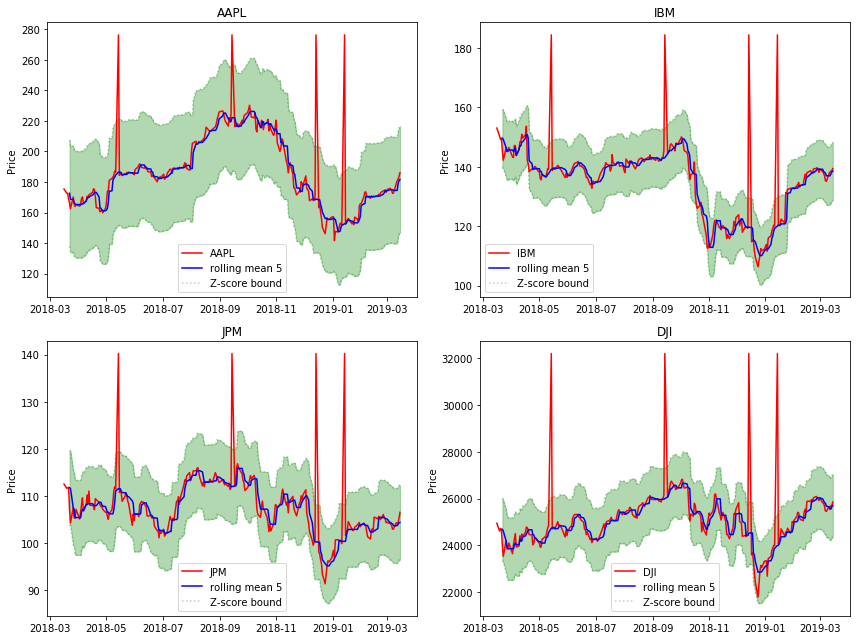

In [82]:
fig, axis = plt.subplots(2,2) 
for ticker in Tickers:
    
    price = Adj_Close[ticker].copy()
    price_ma = price.rolling(5).median() 
    price_high = price_ma+1.5*mad(price) 
    price_low = price_ma-1.5*mad(price)
    
    if ticker == Tickers[0]: 
        pic = axis[0][0]
    if ticker == Tickers[1]: 
        pic = axis[0][1]
    if ticker == Tickers[2]: 
        pic = axis[1][0]
    if ticker == Tickers[3]: 
        pic = axis[1][1]
    
    pic.plot(price, 'r-')
    pic.plot(price_ma, 'b-')
    pic.plot(price_high, 'g:', alpha=0.3)
    pic.plot(price_low, 'g:', alpha=0.3)
    pic.fill_between(price.index, price_high, price_low, color='g', alpha=0.3) 
    pic.set_title(ticker)
    pic.set_ylabel('Price')
    pic.legend([ticker, 'rolling mean 5', 'Z-score bound']) 

fig.set_size_inches(12,9)
fig.tight_layout()

- In the above two figures, introduced outliers (1.2 times the maximum value) are shown as red spikes. 
- In the first figure, the mean (blue curve) is clearly affected by the outliers, also showing peaks after the dates outlier is introduced, albeit the blue peaks are lower than the red spikes.
- In the second figure, it is clear that outliers have very limited impact on rolling median, as blue curves have no human visible peaks after the date of outlier.
- Therefore using median and median adjusted deviation is more effective in identificaiton of outliers.

### Box plot

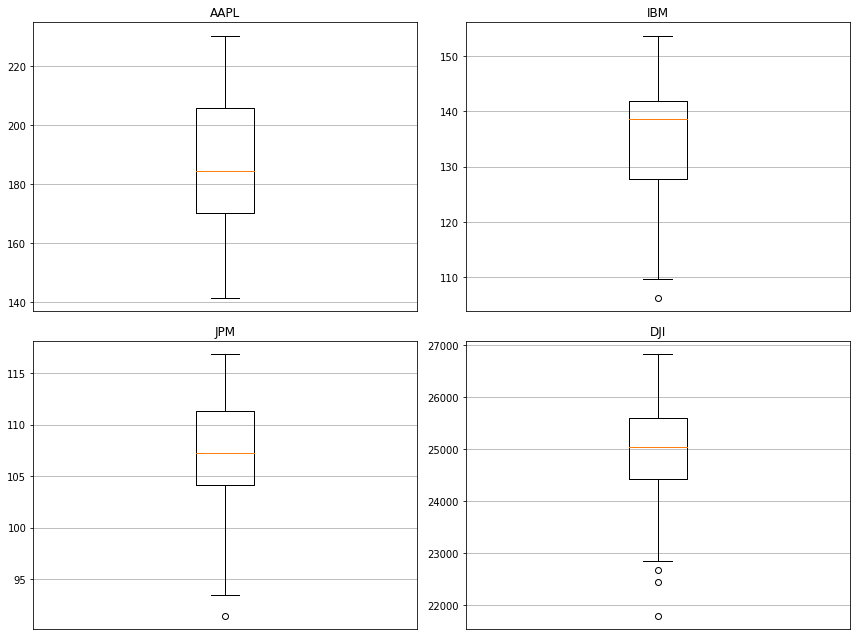

In [83]:
# reset data to remove the previously introduced outliers
Adj_Close = pd.DataFrame(columns=Tickers)
for ticker in Tickers:
    Adj_Close[ticker] = all_data[ticker]['Adj Close'].copy()

fig, axis = plt.subplots(2,2) 
for ticker in Tickers:
    
    if ticker == Tickers[0]: 
        pic = axis[0][0]
    if ticker == Tickers[1]: 
        pic = axis[0][1]
    if ticker == Tickers[2]: 
        pic = axis[1][0]
    if ticker == Tickers[3]: 
        pic = axis[1][1]   
        
    pic.boxplot(Adj_Close[ticker])
    pic.set_title(ticker)
    pic.set_xticks([])
    pic.grid()

fig.set_size_inches(12,9)
fig.tight_layout()

- The box plot above demonstrates the dispersion of adj.close price of the 4 tickers.
- The orange line is the median and the box is the interquartile range (IQR). The top and bottom whiskers represents the range of the data.
- Median may be far away from the middle of IQR, and height of Q1 and Q3 may also differ a lot. This asymmetricity suggests price data could be skewed.
- The circle outside whiskers represent flier points. They are potentially outliers.
- Therefore Guassian Distribution does not fit the price data of these 4 tickers well.

## Robust Estimators
median, IQR (Interquartile range) and MAD (Median Absolute Deviation)
### Python functions

In [84]:
def Get_Median (input_series):
    tmp = input_series.sort_values() 
    median = tmp[round(len(tmp)/2)] 
    return median 

def Get_IQR (input_series):
    tmp = input_series.sort_values() 
    Q1 = tmp[round(len(tmp)/4)] 
    Q3 = tmp[round(len(tmp)/4*3)] 
    IQR = Q3-Q1
    return IQR

def Get_MAD (input_series):
    median = Get_Median (input_series) 
    Dev = abs(input_series - median) 
    MAD = Get_Median(Dev) 
    return MAD

### Computational Complexity
- N is the length of the input series.
- Get_Median: The overall complexity would be O(N*log(N)):
    - There are only two steps: 1)sort the seris 2) index-addressing to get the value right in the middle of the sorted series,
    - The average performance of typical good sorting algorithm like quick-sort and merge-sort is O(N*log(N)). (Although some other sorting algorithm could have best case performance of N, usually average performance is considered.)
    - index addressing to find the middle value doesn't have denpendency on length of input, or O(1).
- Get_IQR: The overall complexity would also be O(N*log(N)):
    - The first step is still sorting, with complexity O(N*log(N)).
    - Then 2 index-addressing and an addition is performed, each with complexity O(1).
    - also Get_IQR has a few more arithmetic steps than Get_median, the complexity for average performance is asymptotic. Therefore they would have the same complexity.
- Get_MAD: The overall complexity would still be O(N*log(N)):
    - The 1st and 3rd step is to use Get_Median, each with complexity O(N*log(N)).
    - The 2nd step is to calculate deviation, or subtract a scalar from each of the elements in a vector of length N. So the complexity could be O(N).
    - So overall the computational time cost of Get_MAD would be higher than the other two, but the asymptotic complexity would be the same: O{N*log(N)+N+N*log(N)}=> O(N*log(N))

### Breakdown Point

- Breakdown Point of an estimator is defined as the maximum allowed fraction of outliers that an estimator can tolerate, defined to be between 0 and 0.5.
- Breakdown Point of Get_Median is simply 0.5: If less than half the total data are outliers, the median value would still be in the "clean" data. If more than half the total data are outliers, even if just one more, the median value would immediately be among the outliers. This is the highest possible breakdown point.
- Breakdown Point of Get_IQR is 0.25: IQR = Q3-Q1; The breakdown point for the more sensitive estimate Q3 is 0.25 and the reasoning would be the same process as that of median. The breakdown point for the less sensitive estimate Q1 is 0.75 but it will never be hit since Q3 wouldbreak down first.
- Breakdwon Point for MAD is also 0.5, as it involved 2 median calculation. The step to calculate deviation does not have a concern of breakdown. 
- Mean has 0 breakdown point: 1 single outlier will change its value. In addtion, the breakdown point of the standard deviation is 0% too - it can be made arbitrarily large by the increase of the value of a single outlier.
- Therefore, median, IQR and MAD are more robust estimators compared to mean and standard deviation.

## Robust and OLS regression

### Ordinary Least Squares (OLS) regression

Problem Formulation:
- assume there is a linear relationship between observation and measurements: $ \textbf{y} = \textbf{X} \textbf{z} + \textbf{e}$;
- another way to state this: $y[n] = A + B * x[n] + e[n] $;
- in this case, $\textbf{y}$, the observation, is the return data vector of dow jones index;
- $\textbf{X}$, the predictor matrix, is made up a vector of 1s and the return data vector of target stock;
- $\textbf{z}$ contains the true coefficents A and B;
- $\textbf{e}$ or $e[n]$ represents the zero mean and uncorrelated error.
- objective of OLS regression is to minimized the sum of sqared errors of each point: $\textbf{z} = \arg \min_{z} || \textbf{y} - \textbf{X} \textbf{z} ||^2_2$
- Linear Least Sqaure Estimate with no Probability Model: $\hat{z}_{LS}=(\textbf{X}^T \textbf{X})^{-1}\textbf{X}^T \textbf{y}$

,AAPL,IBM,JPM,DJI
A,0.00016466,-0.000440572,-0.000316331,NaN
B,1.32558,0.960092,0.931408,NaN


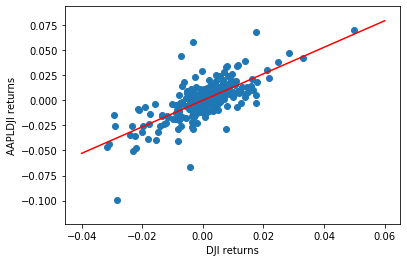

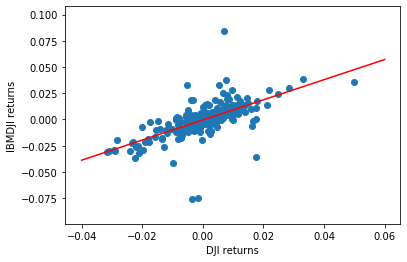

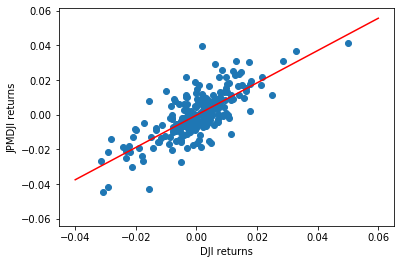

In [85]:
from sklearn import linear_model

returns = pd.DataFrame(columns=Tickers)
for ticker in Tickers:
    returns[ticker] = all_data[ticker]['Returns'].copy().dropna()

reg = linear_model.LinearRegression()
coeffs = pd.DataFrame(columns=Tickers, index=['A', 'B'])
x_axis = np.linspace(-0.04,0.06,len(returns['DJI'])).reshape(-1,1)
for ticker in Tickers:
    if ticker != 'DJI':
        y = returns[ticker].copy().values.reshape(-1,1)
        x = returns['DJI'].copy().values.reshape(-1,1)
        reg.fit(x, y)
        coeffs[ticker]['A'] = float(reg.intercept_)
        coeffs[ticker]['B'] = float(reg.coef_)
        plt.figure()
        plt.scatter(x,y)
        plt.xlabel('DJI returns')
        plt.ylabel(str(ticker + 'DJI returns'))
        plt.plot(x_axis, x_axis * reg.coef_ + reg.intercept_, 'red')
        
coeffs_OLS = coeffs
coeffs

### Huber Regressor

- The Huber Regressor is a more robust regressor compared to linear least sqaure regressor.
- It optimizes the squared loss for the samples where |(y - Xz) / sigma| < epsilon and the absolute loss for the samples where |(y - Xz) / sigma| > epsilon, where z and sigma are parameters to be optimized. 
- The parameter epsilon controls the number of samples that should be classified as outliers. The smaller the epsilon, the more robust it is to outliers.
- By taking absolute loss rather than sqaured loss when 'error' is big, impact of outliers on regression is reduced.

,AAPL,IBM,JPM,DJI
A,-0.000130371,-0.000509435,-0.000800961,NaN
B,1.27021,0.973562,0.919662,NaN


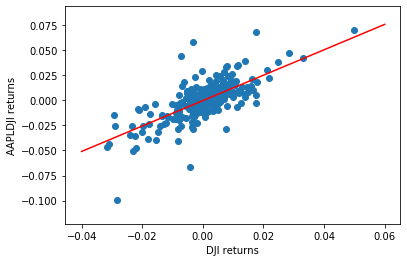

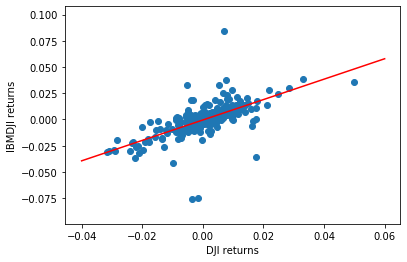

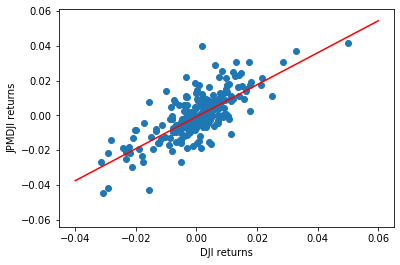

In [86]:
reg = linear_model.HuberRegressor()
coeffs = pd.DataFrame(columns=Tickers, index=['A', 'B'])
x_axis = np.linspace(-0.04,0.06,len(returns['DJI'])).reshape(-1,1)
for ticker in Tickers:
    if ticker != 'DJI':
        y = returns[ticker].copy().values.reshape(-1)
        x = returns['DJI'].copy().values.reshape(-1,1)
        reg.fit(x, y)
        coeffs[ticker]['A'] = float(reg.intercept_)
        coeffs[ticker]['B'] = float(reg.coef_)
        plt.figure()
        plt.scatter(x,y)
        plt.xlabel('DJI returns')
        plt.ylabel(str(ticker + 'DJI returns'))
        plt.plot(x_axis, x_axis * reg.coef_ + reg.intercept_, 'red')
        
coeffs_Huber = coeffs
coeffs

### Comparison and Impact of outliers

In [87]:
print('OLS')
print(coeffs_OLS)
print()
print('Huber')
print(coeffs_Huber)

OLS
         AAPL          IBM          JPM  DJI
A  0.00016466 -0.000440572 -0.000316331  NaN
B     1.32558     0.960092     0.931408  NaN

Huber
          AAPL          IBM          JPM  DJI
A -0.000130371 -0.000509435 -0.000800961  NaN
B      1.27021     0.973562     0.919662  NaN


- By observing the table, the intercept or A for all 3 stocks, obtained from both regression methods are all pretty small, suggesting it could be treated as 0.
- Both type of regression output coeffecients (B) with similar values when no outlier is introduced.
- This table is used as a reference to assess the impact of outliers below.

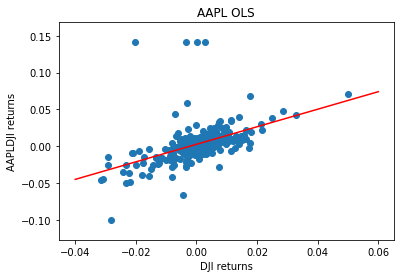

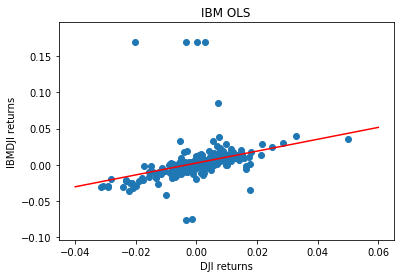

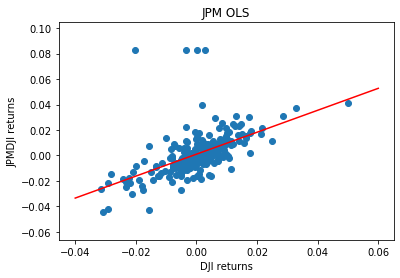

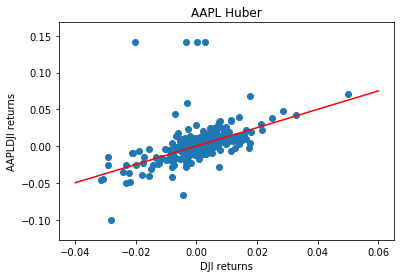

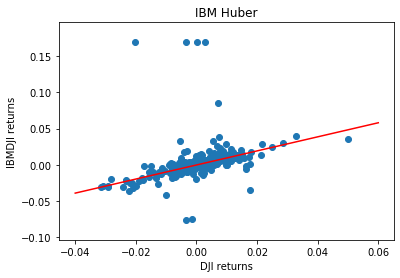

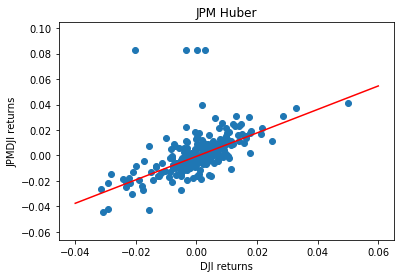

In [88]:
returns = pd.DataFrame(columns=Tickers)
for ticker in Tickers:
    returns[ticker] = all_data[ticker]['Returns'].copy().dropna()
    
dates = ['2018-05-14', '2018-09-14', '2018-12-14', '2019-01-14']
for ticker in Tickers:
    if ticker != 'DJI':
        max_ret = returns[ticker].max()
        for date in dates:
            returns[ticker][date]=2*max_ret
        
reg = linear_model.LinearRegression()
coeffs = pd.DataFrame(columns=Tickers, index=['A', 'B'])
x_axis = np.linspace(-0.04,0.06,len(returns['DJI'])).reshape(-1,1)
for ticker in Tickers:
    if ticker != 'DJI':
        y = returns[ticker].copy().values.reshape(-1,1)
        x = returns['DJI'].copy().values.reshape(-1,1)
        reg.fit(x, y)
        coeffs[ticker]['A'] = float(reg.intercept_)
        coeffs[ticker]['B'] = float(reg.coef_)   
        plt.figure()
        plt.title(str(ticker)+' OLS')
        plt.scatter(x,y)
        plt.xlabel('DJI returns')
        plt.ylabel(str(ticker + 'DJI returns'))
        plt.plot(x_axis, x_axis * reg.coef_ + reg.intercept_, 'red')
coeffs_OLS = coeffs

reg = linear_model.HuberRegressor()
coeffs = pd.DataFrame(columns=Tickers, index=['A', 'B'])
x_axis = np.linspace(-0.04,0.06,len(returns['DJI'])).reshape(-1,1)
for ticker in Tickers:
    if ticker != 'DJI':
        y = returns[ticker].copy().values.reshape(-1)
        x = returns['DJI'].copy().values.reshape(-1,1)
        reg.fit(x, y)
        coeffs[ticker]['A'] = float(reg.intercept_)
        coeffs[ticker]['B'] = float(reg.coef_) 
        plt.figure()
        plt.title(str(ticker)+' Huber')
        plt.scatter(x,y)
        plt.xlabel('DJI returns')
        plt.ylabel(str(ticker + 'DJI returns'))
        plt.plot(x_axis, x_axis * reg.coef_ + reg.intercept_, 'red')
coeffs_Huber = coeffs

In [89]:
print('OLS with outliers')
print(coeffs_OLS)
print()
print('Huber with outliers')
print(coeffs_Huber)

OLS with outliers
         AAPL        IBM         JPM  DJI
A  0.00268788  0.0023703  0.00101501  NaN
B     1.18911   0.820511    0.861459  NaN

Huber with outliers
          AAPL         IBM          JPM  DJI
A  0.000324319 -0.00034181 -0.000704425  NaN
B      1.24487    0.972192     0.920989  NaN


- It is clear that only 4 artificial outliers, each with only 2 × the maximum value as magnitude, impacts the outcome of OLS:
    - The magnitude of intercept has been amplifier for one level of magnitude / about 10 times.
    - The value of coeffcients (B or slope of red line) has been reduced.
- In contrast, the outcome of Huber regression are much less affected.
- OLS minimizes the sum of squared errors which is similar to standard deviation: 
    - squared error = (prediction - measurement)^2
    - StdDev = (value - mean)^2 
    - as mentioned in previous question, statistics like mean and standard deviation are not robust.
    - Therefore OLS is not a robust regression method.
- As explained above, Huber regressor's algorithm surpresses the impact of outliers. Therefore it is a more robuts regression method. It's rebustness is also demonstrated in the above test.

## Robust Trading Strategies
- The Moving Average Crossover is a simple trading strategy based on the following rules:
    - Buy X shares of a stock when its 20-day MA > 50-day MA
    - Sell X shares of the stock when its 20-day MA < 50-day MA

### Rolling Mean

In [90]:
Adj_Close = pd.DataFrame(columns=Tickers)
Adj_Close_Corrupt = pd.DataFrame(columns=Tickers)
dates = ['2018-07-13', '2018-09-14','2018-10-29', '2018-11-14','2018-12-14', '2019-01-14']

for ticker in Tickers:
    Adj_Close[ticker] = all_data[ticker]['Adj Close'].copy().dropna()
    Adj_Close_Corrupt[ticker] = Adj_Close[ticker].copy()
    mag = Adj_Close_Corrupt[ticker].max()-Adj_Close_Corrupt[ticker].mean()
    for date in dates:
            Adj_Close_Corrupt[ticker][date]=Adj_Close_Corrupt[ticker][date]-5*mag   
    

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


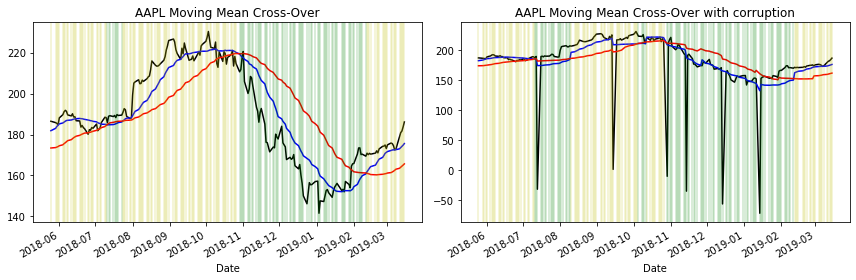

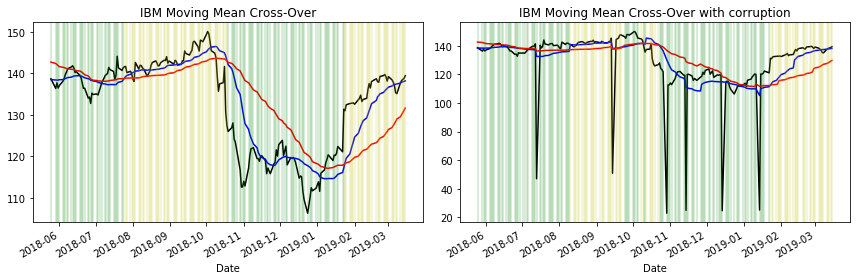

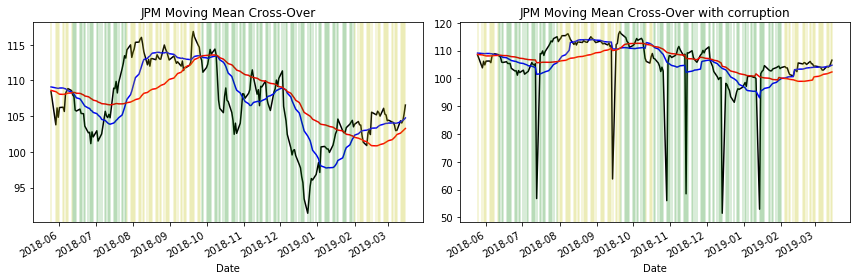

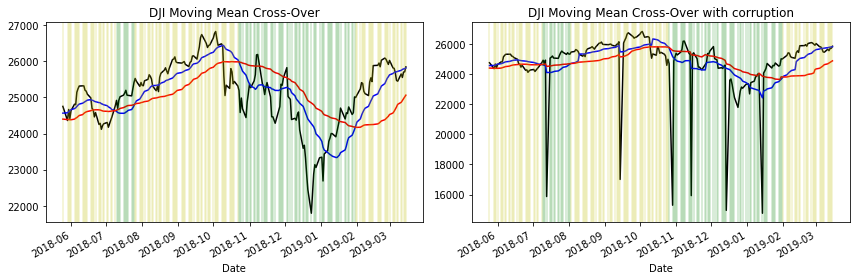

In [91]:
for ticker in Tickers:
    fig, ax = plt.subplots(nrows=1, ncols=2)
    
    price = Adj_Close[ticker]
    MA20 = price.rolling(20).mean()
    MA50 = price.rolling(50).mean()
    Dec_Var = (MA20-MA50).dropna()
    Decisions = np.sign(Dec_Var)

    start_index = Decisions.index[0] 
    price[start_index:].plot(style='k-', ax=ax[0]) # plot raw time series in green
    MA20[start_index:].plot(style='b-', ax=ax[0]) # plot MA20 in blue
    MA50[start_index:].plot(style='r-', ax=ax[0]) # plot MA50 in red
    
    for i in Decisions.index:
        if Decisions[i]==1:
            ax[0].axvline(x=i, alpha=0.2, color='y') # short
        if Decisions[i]==-1:
            ax[0].axvline(x=i, alpha=0.2, color='g') # long
    
    ax[0].set_title(ticker+' Moving Mean Cross-Over')
    
    # with outliers
    price_Corrupt = Adj_Close_Corrupt[ticker]
    MA20_Corrupt = price_Corrupt.rolling(20).mean()
    MA50_Corrupt = price_Corrupt.rolling(50).mean()
    Dec_Var_Corrupt = (MA20_Corrupt-MA50_Corrupt).dropna()
    Decisions_Corrupt = np.sign(Dec_Var_Corrupt)

    start_index = Decisions_Corrupt.index[0] 
    price_Corrupt[start_index:].plot(style='k-', ax=ax[1]) 
    MA20_Corrupt[start_index:].plot(style='b-', ax=ax[1]) 
    MA50_Corrupt[start_index:].plot(style='r-', ax=ax[1]) 
    
    for i in Decisions_Corrupt.index:
        if Decisions_Corrupt[i]==1:
            ax[1].axvline(x=i, alpha=0.2, color='y') # short
        if Decisions_Corrupt[i]==-1:
            ax[1].axvline(x=i, alpha=0.2, color='g') # long
    
    ax[1].set_title(ticker+' Moving Mean Cross-Over with corruption')
           
    fig.set_size_inches(12,4)
    fig.tight_layout()

It is clear that outliers greatly affects the decision of long and short (green and yellow region).

### Rolling Median

As mentioned in previous questions, median is a more robust estimator than mean.

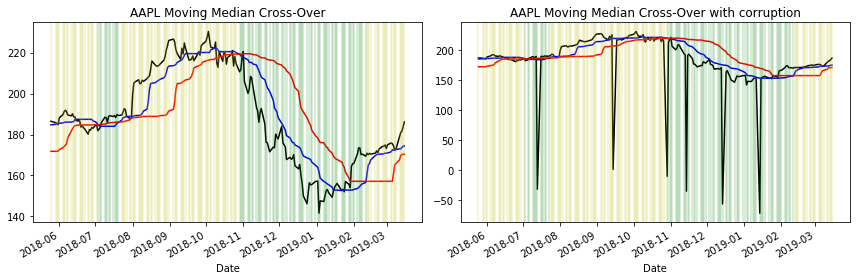

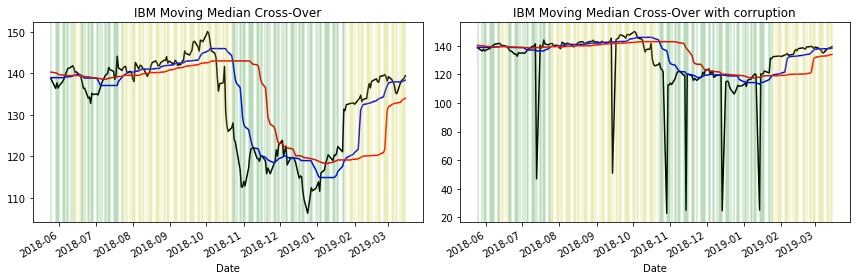

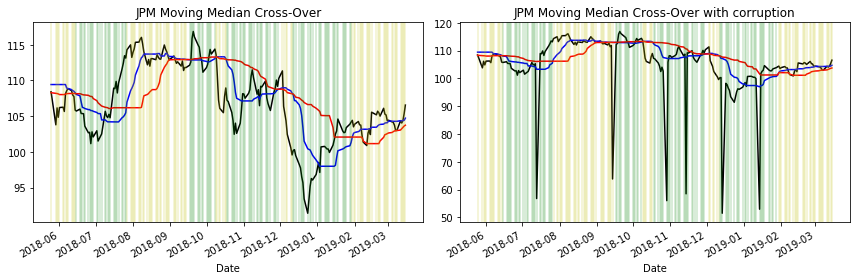

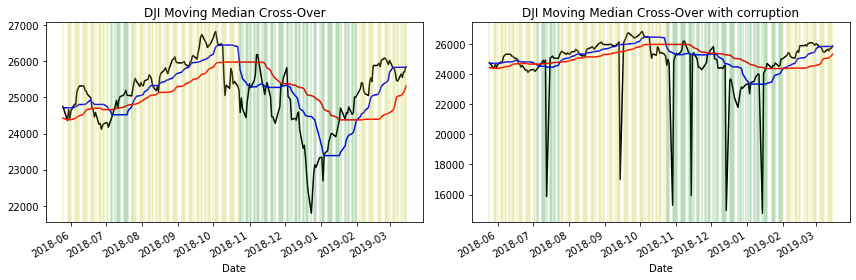

In [92]:
for ticker in Tickers:
    fig, ax = plt.subplots(nrows=1, ncols=2)
    
    price = Adj_Close[ticker]
    MA20 = price.rolling(20).median()
    MA50 = price.rolling(50).median()
    Dec_Var = (MA20-MA50).dropna()
    Decisions = np.sign(Dec_Var)

    start_index = Decisions.index[0] 
    price[start_index:].plot(style='k-', ax=ax[0]) # plot raw time series in green
    MA20[start_index:].plot(style='b-', ax=ax[0]) # plot MA20 in blue
    MA50[start_index:].plot(style='r-', ax=ax[0]) # plot MA50 in red
    
    for i in Decisions.index:
        if Decisions[i]==1:
            ax[0].axvline(x=i, alpha=0.2, color='y') # short
        if Decisions[i]==-1:
            ax[0].axvline(x=i, alpha=0.2, color='g') # long
    
    ax[0].set_title(ticker+' Moving Median Cross-Over')
    
    # with outliers
    price_Corrupt = Adj_Close_Corrupt[ticker]
    MA20_Corrupt = price_Corrupt.rolling(20).median()
    MA50_Corrupt = price_Corrupt.rolling(50).median()
    Dec_Var_Corrupt = (MA20_Corrupt-MA50_Corrupt).dropna()
    Decisions_Corrupt = np.sign(Dec_Var_Corrupt)

    start_index = Decisions_Corrupt.index[0] 
    price_Corrupt[start_index:].plot(style='k-', ax=ax[1]) 
    MA20_Corrupt[start_index:].plot(style='b-', ax=ax[1]) 
    MA50_Corrupt[start_index:].plot(style='r-', ax=ax[1]) 
    
    for i in Decisions_Corrupt.index:
        if Decisions_Corrupt[i]==1:
            ax[1].axvline(x=i, alpha=0.2, color='y') # short
        if Decisions_Corrupt[i]==-1:
            ax[1].axvline(x=i, alpha=0.2, color='g') # long
    
    ax[1].set_title(ticker+' Moving Median Cross-Over with corruption')
           
    fig.set_size_inches(12,4)
    fig.tight_layout()

When using median, the trading strategy Moving Average Crossover is a lot less affected by synthetic outliers, compared with using mean in # 4.4.1. From my perspective, when median is used, there is no change to trading long or short at all, as demonstrated by the plot above. In conclusion, taking median as average make the simple trading strategy "Moving Average Crossover" more robust.

# Graphs in Finance

## Stock Choice

In [93]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [94]:
df = pd.read_csv('snp_allstocks_2015_2019.csv', header=0, index_col=0)
info = pd.read_csv('snp_info.csv', index_col=0)

In [95]:
Tickers = info.loc[info['GICS Sub Industry']=='Financial Exchanges & Data']['Symbol'].tolist()
print(Tickers)

['CBOE', 'CME', 'ICE', 'MCO', 'MSCI', 'NDAQ', 'SPGI']


In [96]:
info.loc[info['GICS Sub Industry']=='Financial Exchanges & Data']

,Security,Symbol,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added[3][4],CIK,Founded
96,Cboe Global Markets,CBOE,reports,Financials,Financial Exchanges & Data,"Chicago, Illinois",2017-03-01,1374310,NaN
121,CME Group Inc.,CME,reports,Financials,Financial Exchanges & Data,"Chicago, Illinois",2006-08-11,1156375,NaN
254,Intercontinental Exchange,ICE,reports,Financials,Financial Exchanges & Data,"Atlanta, Georgia",2007-09-26,1571949,NaN
329,Moody's Corp,MCO,reports,Financials,Financial Exchanges & Data,"New York, New York",NaN,1059556,1909
333,MSCI Inc,MSCI,reports,Financials,Financial Exchanges & Data,"New York, New York",2018-04-04,1408198,NaN
335,"Nasdaq, Inc.",NDAQ,reports,Financials,Financial Exchanges & Data,"New York, New York",2008-10-22,1120193,NaN
423,"S&P Global, Inc.",SPGI,reports,Financials,Financial Exchanges & Data,"New York, New York",NaN,64040,NaN


Reason to choose these 7 assests:
- First they are in the same GICS Sub Industry: Financial Exchanges & Data
- Second, if everything goes as expected (which are not yet for this 2020), I would work as a technology graduate in a major investment bank. So naturally I am interested in finance sector.
- After reading books like << Flash Boy >> and << Why aren't they shouting >>, I am particularly interested in how those major exchanges operate, especially on the technical side.
- The shiny stars in news are usually companies like JP Morgen or Goldman Sachs, it might be interesting to have a look at the exchanges and data service provider, which are also a crucial part of the finance industry. 
- These companies would be both friends and competitors:
    - Friends: They also the same set of rules and regulation.
    - Competitors: Their potential customers are in the same population: investors, hedge funds, big banks etc. Every unit of transaction volume in an exchange matters in the sense of liquidity and prosperity.


In [97]:
Assets = df[Tickers]
log_px = np.log(Assets) 
log_ret = log_px.diff().dropna()

## Correlation Matrix and Graph

In [98]:
corr = log_ret.corr()
corr # Calculate the correlation between individuals. 

,CBOE,CME,ICE,MCO,MSCI,NDAQ,SPGI
CBOE,1.000000,0.472100,0.475518,0.265445,0.251626,0.473998,0.236524
CME,0.472100,1.000000,0.673370,0.426087,0.391053,0.625521,0.445856
ICE,0.475518,0.673370,1.000000,0.484213,0.441311,0.689399,0.464279
MCO,0.265445,0.426087,0.484213,1.000000,0.596511,0.509056,0.779344
MSCI,0.251626,0.391053,0.441311,0.596511,1.000000,0.497843,0.597342
NDAQ,0.473998,0.625521,0.689399,0.509056,0.497843,1.000000,0.498252
SPGI,0.236524,0.445856,0.464279,0.779344,0.597342,0.498252,1.000000


- The correlation matrix shows the how correlated are the log-return history of each asset.
- The diagonal elements are unity, as it would be auto-correlation.
- The off diagonal elements show that, to what extent the log-return history of two asset are linked/depenedent.
- From the table, we can see that each asset has some correlation with each other, with weak or strong connection reflected by the magnitude.

In [99]:
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
# Transform it in a links data frame (3 columns only):

In [100]:
# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered1=links.loc[ (links['value'] > 0.5) & (links['var1'] != links['var2']) ]
links_filtered1
# need to adjust the threshold, originally 0.8

,var1,var2,value
9,CME,ICE,0.673370
12,CME,NDAQ,0.625521
15,ICE,CME,0.673370
19,ICE,NDAQ,0.689399
25,MCO,MSCI,0.596511
26,MCO,NDAQ,0.509056
27,MCO,SPGI,0.779344
31,MSCI,MCO,0.596511
34,MSCI,SPGI,0.597342
36,NDAQ,CME,0.625521


After the filter, the number of links in the list reduces to 14. Previously it was 49. This would help highlighting the key relationship in the graph. 

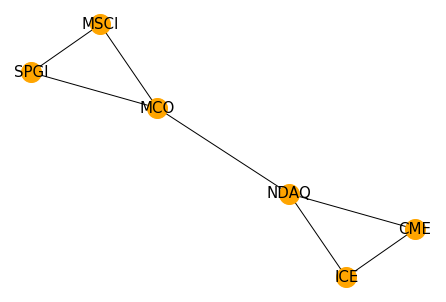

In [101]:
G1=nx.from_pandas_edgelist(links_filtered1, 'var1', 'var2')
nx.draw(G1, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)

Correlation matrix provides the basis for this graph: 
- If the correlation between two assets are above the threshold, then there would be a link(correlation) between two nodes(assets).
- The larger the magnitude of correlaiton, the stronger the connnection is. 
- Self correlation has been omitted.

When the link value is high pass filtered by 0.5 a very simple but elegent graph is produced:
- Cboe Global Markets (COBE) unfortunately disappeared. Looking back to the link or correlation table, it is true that no link value is above 0.5. Cboe Global Markets is an American company that owns the Chicago Board Options Exchange and the stock exchange operator BATS Global Markets.
- On the one side, the 3 exchanges are linked together: 
    - CME (CME Group Inc.): It is the world's largest financial derivatives exchange.
    - ICE (Intercontinental Exchange): Intercontinental Exchange is an American company that owns exchanges for financial and commodity markets, and operates 12 regulated exchanges and marketplaces.
    - Nasdaq is the world famous New York stock exchanged. Even people outside the finance industry knows its name.
    - It is not surprising that these stock exchanges are grouped together. Their performance from 2015 to 2019 should naturally have some similarity.
- The other side contains financial data (index) providers:
    - (MCQ) Moody's Corp: This is an American business and financial services company. It is the holding company for Moody's Investors Service, an American credit rating agency, and Moody's Analytics, an American provider of financial analysis software and services. It is probably most famous for its credit ratings.
    - MSCI Inc: This is an American finance company serving as a global provider of equity, fixed income, hedge fund stock market indexes, and multi-asset portfolio analysis tools. 
    - S&P Global, Inc.: The well know index provider. Its primary areas of business are financial information and analytics. 
- So this graph could be used as a classifier: The left hand side are exchanges. The right hand side are service providers. This graph analytic is much more simple than any machine learning algorithm and requires much less training.

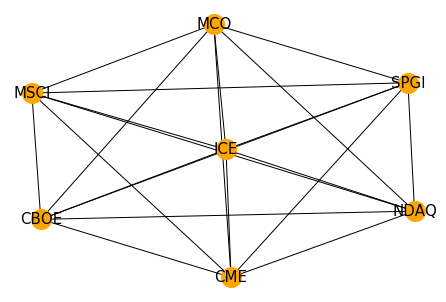

In [118]:
# if no link is filtered out except self-correlation links
links_filtered2=links.loc[ (links['var1'] != links['var2']) ]

G2=nx.from_pandas_edgelist(links_filtered2, 'var1', 'var2')
nx.draw(G2, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)

- (Above) If links are not filtered by any threshold, the graphy cant really tell much as all nodes are linked to each other.
- (Below) After lower the threshold a little bit, COBE has been included into the graph. One half is now 4 echanges, while the other half is the 3 data service providers, confirming the potential of using graph as 'clever' classifier.

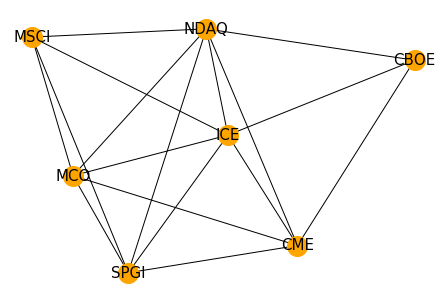

In [103]:
# if link threshold is reduced to 0.4, this should allow CBOE in
links_filtered3=links.loc[ (links['value'] > 0.4) &(links['var1'] != links['var2']) ]

G3=nx.from_pandas_edgelist(links_filtered3, 'var1', 'var2')
nx.draw(G3, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)

## re–ordering of graph vertices and time series

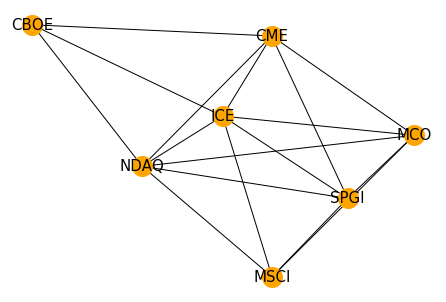

In [104]:
links_sorted = links_filtered3.sort_values(by=['value'])
# re-order the links
G4=nx.from_pandas_edgelist(links_sorted, 'var1', 'var2')
nx.draw(G4, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)

- Please find some discussion of the graphs in question 5.2.
- Re-ordering of the graph vertices should not change the result (above). As long as link values are the same, the link between each vertices are unchanged. Each time the graphy drawing engine might give a different picture, but they should be essentially the same, as the correlation relationship behind is unchanged. The observation and conclusion ,such as local grouping of exchanges vs index/data provider, from the graph should be invariant. 
- Re-ordering the time series changes the graph completely (below). When the log return data are sorted by its value, its relation with time has been completely broken up. The time dependancy of stock price between today and tomorrow is ruined. This way the times series have been completely corrupted. Thus it is not surprising to see a not very informing graph, in which each node is link with each other.
- In conclusion, the topology of my graph is dictated by the nature of the data.

In [105]:
#re-ordering the time series
log_ret_sort = log_ret
for ticker in Tickers:
    Index = log_ret_sort[ticker].index
    Data = log_ret[ticker].sort_values().values
    tmp = pd.Series(data=Data, index=Index)
    log_ret_sort[ticker] = tmp

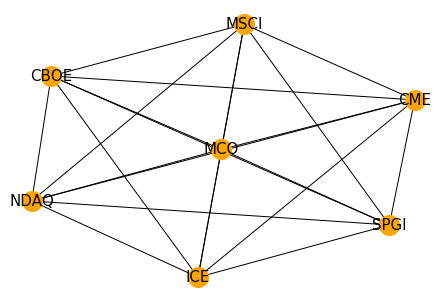

In [106]:
corr2 = log_ret_sort.corr()
links2 = corr2.stack().reset_index()
links2.columns = ['var1', 'var2','value']
links_filtered5=links2.loc[ (links2['value'] > 0.5) & (links2['var1'] != links2['var2']) ]
G5=nx.from_pandas_edgelist(links_filtered5, 'var1', 'var2')
nx.draw(G5, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)

## Spectral Distance

In this question, spectral distance would be used to to construct graphs. This choice is made because:
- For an EEE student, it is easy to assciate from time series data to frequency domain analysis;
- For companies in the same industry and section, economic cycles and business trends should have similar impact on their (log) returns. It is well known that frequency domain analysis is a great tool to uncover the trend of data. 

Fast Fourier Transform would be applied to log price data. Then power spectrum is calcuate from the complex output array. This is used to find correlation between assets. Graph is produced in the same way as before.

In [107]:
Assets = df[Tickers]
log_px = np.log(Assets) 
log_ret = log_px.diff().dropna()


Text(0.5, 1.0, 'Returns Power Spectrums')

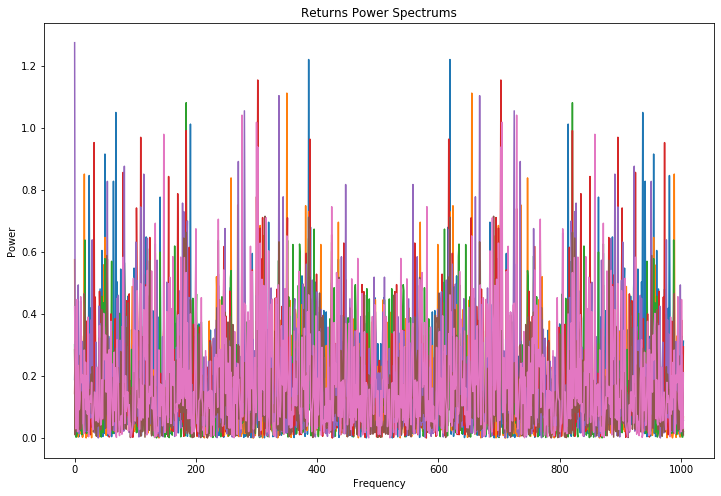

In [108]:
log_ret_f = pd.DataFrame(columns=log_ret.columns)

for ticker in Tickers:
    log_ret_f[ticker]=np.abs(np.fft.fft(log_ret[ticker].values))**2 
    
plt.figure(figsize=(12,8))
plt.plot(log_ret_f)
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('Returns Power Spectrums')
    

In [109]:
corr_f = log_ret_f.corr()
corr_f

,CBOE,CME,ICE,MCO,MSCI,NDAQ,SPGI
CBOE,1.000000,0.195036,0.192161,0.096677,0.011919,0.250224,0.112796
CME,0.195036,1.000000,0.441120,0.208073,0.180981,0.348497,0.265468
ICE,0.192161,0.441120,1.000000,0.261498,0.211611,0.447133,0.259821
MCO,0.096677,0.208073,0.261498,1.000000,0.339289,0.254382,0.561332
MSCI,0.011919,0.180981,0.211611,0.339289,1.000000,0.280051,0.335693
NDAQ,0.250224,0.348497,0.447133,0.254382,0.280051,1.000000,0.296061
SPGI,0.112796,0.265468,0.259821,0.561332,0.335693,0.296061,1.000000


In [110]:
links_f = corr_f.stack().reset_index()
links_f.columns = ['var1', 'var2','value']
# links_f.sort_values(by=['value'])

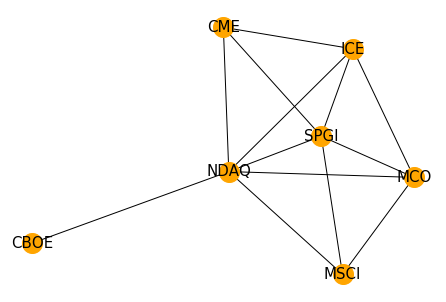

In [119]:
links_f_filtered=links_f.loc[ (links_f['value'] > 0.25) & (links_f['var1'] != links_f['var2']) ]
G_f=nx.from_pandas_edgelist(links_f_filtered, 'var1', 'var2')
nx.draw(G_f, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)

Similar Interpretation could be made from the graph constructed from spectral distance:
- (below) when threshold is 0.3, two local groups of exchange and data/index provider are clearly demonstrated, and they are more seperated since there is now no visible links between the local groups. The classification has become more "black and white" as there is now no visible link between the two group.
- (above) a new interesting observation could be made from the graph when threshold is 0.25:
    - NDAQ is linked to all 3 index/data providers 
    - and SPGI is also linked to 3 other exchange stocks
    - this could be interpreted as the higher relative importance of Nasdaq and S&P.
- CBOE is still not really correlated with any other asset except weakly with NDAQ.

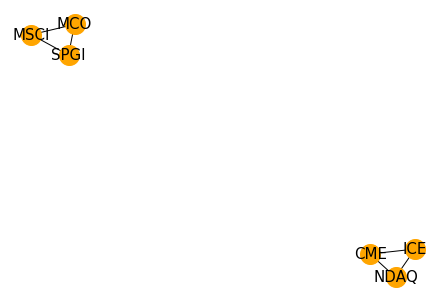

In [112]:
links_f_filtered=links_f.loc[ (links_f['value'] > 0.3) & (links_f['var1'] != links_f['var2']) ]
G_f=nx.from_pandas_edgelist(links_f_filtered, 'var1', 'var2')
nx.draw(G_f, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)

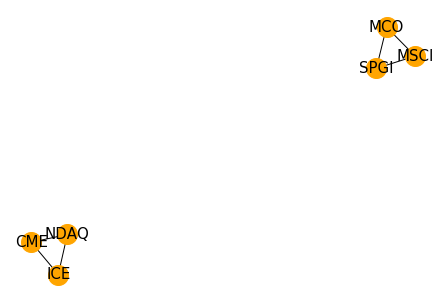

In [113]:
links_f_sorted = links_f_filtered.sort_values(by=['value'])
G_f2=nx.from_pandas_edgelist(links_f_sorted, 'var1', 'var2')
nx.draw(G_f2, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)

- As said in 5.3, my graphs would be completely dictated by the nature of the data. 
- re–ordering of graph vertices would not affect my results, as it is only changing the position of nodes on the graph. But links between nodes, which represent similairty/correlation relationship would be unchanged. Therefore although the graphy could look a bit different, the conclusion to draw should be the same. (see graph above)
- re-ordering the power spectrum value would completely corrupt my results, as each value represents the amount of the energy in a frequency bin. Any kind of re-ordering would destroy the data integrity.  When spectral datas are re-ordered, their characteristics are lost, so everyone looks similar to each other. Thus, the graph output doesn't tell much.(see graph below)

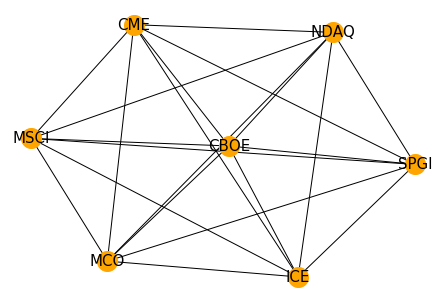

In [114]:
#re-ordering the power spectrum
log_ret_f_sort = log_ret_f
for ticker in Tickers:
    Index = log_ret_f[ticker].index
    Data = log_ret[ticker].sort_values().values
    tmp = pd.Series(data=Data, index=Index)
    log_ret_f_sort[ticker] = tmp

corr = log_ret_sort.corr()
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
links_filtered=links.loc[ (links['value'] > 0.9) & (links['var1'] != links['var2']) ]
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
nx.draw(G, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)

## Using Raw Price

There would be a lot of disadvantage using raw price:
- the price of assets would have very large range: one stock could be around 10, the other could be around 1000. Taking natural low helps compressing the range.
- Also, price of different stocks would have different statistics like mean, standard deviation and skewness. 
- As it has been discusses a few times before, raw price is definitly not stationary in the long term. Using return instead of price would make the time series more stationary.
- It is pretty unreasonable to assume that raw price would follow a normal distribution. Log return fits normal distribution better.
- There would be problem using the power spectrum of price data, as raw price would have non-zero mean. This means a much larger value at DC (f=0). Higher frequency components could be overwhelmed by this DC power, which makes every stock more similiar in frequency domain. This could inversely affect distance calculation.

In [115]:
Raw_Price = Assets
corr = Raw_Price.corr()
corr

,CBOE,CME,ICE,MCO,MSCI,NDAQ,SPGI
CBOE,1.000000,0.871208,0.918552,0.870458,0.865779,0.819957,0.878410
CME,0.871208,1.000000,0.964364,0.918537,0.959617,0.910374,0.947746
ICE,0.918552,0.964364,1.000000,0.906585,0.961393,0.943331,0.953201
MCO,0.870458,0.918537,0.906585,1.000000,0.957107,0.864317,0.974046
MSCI,0.865779,0.959617,0.961393,0.957107,1.000000,0.956059,0.982353
NDAQ,0.819957,0.910374,0.943331,0.864317,0.956059,1.000000,0.927190
SPGI,0.878410,0.947746,0.953201,0.974046,0.982353,0.927190,1.000000


The matrix shows that the price of each stock is quite correlated to each other, making the distinction between links very difficult. It is very hard to find a reasonable and explainable value to filter out a link as connection on graph.

In [116]:
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
links_filtered=links.loc[ (links['var1'] != links['var2']) ]
links_filtered['value'].mean()
# no threhold to filter links

0.9214563084901696

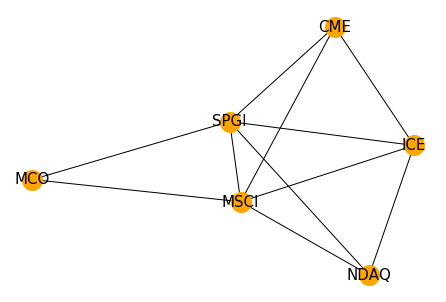

In [117]:
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
links_filtered=links.loc[ (links['value'] > 0.92) & (links['var1'] != links['var2']) ]
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
nx.draw(G, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)

- If no link is filtered out, then every assest is connected to each other, conveying no information. Everything could be nothing. 
- However, if a form of threshold is used, such as mean value of link, as it is shown above, the graph would lead to wierd intrepretations. For example, NDAQ would have no connection with CME, which is not explainable.

So in conclusion, raw price should not be considered in graph analysis and log return works much better.